# Lending Club Case Study 




## Problem Statement
### In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
#uploading Loan.csv file in dataframe 'df'
df=pd.read_csv('loan.csv',low_memory=False)
pd.set_option('display.max_columns', None) #to display all columns
pd.set_option('display.max_rows',None) #to display all rows

In [293]:
#There Is No Header or Summary In the File So Ignoring Them

### Checking for shape of data

In [2]:
df.shape

(39717, 111)

# Deleting rows with 100% null values


In [3]:
(df.isnull().sum()*100)/len(df)

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [4]:
#Total Column With NA Values In It
print("Total columns with value as NA",len(df.columns[df.isna().all()].tolist()))
df.dropna(axis=1, how='all',inplace=True)

Total columns with value as NA 54


## Checking and dropping columns for 70% or more null Values

In [5]:
#loan.drop(loan.iloc[:, 53:105], inplace = True, axis = 1) 
100*df.iloc[:, 0:57].isnull().mean()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [76]:
#total columns with 70% of data as null deleting those columns
total_rows_DF=len(df)
for total_rows_70Per_Null in df.columns:
    if df[total_rows_70Per_Null].isna().mean().round(2)>=.70:
         df=df.drop(total_rows_70Per_Null,axis=1)

#### Dropping rows whose loan status is current

In [77]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [78]:
#'Current' Data is not the deciding factor so removing these data
df=df[df['loan_status']!='Current']
print('Total Number of Rows after removing Loan_status As "Current"',len(df))

Total Number of Rows after removing Loan_status As "Current" 38577


### Checking for duplicate rows

In [79]:
duplicateRow=len(df[df.duplicated()])
print("Total Duplicated Rows Are",round(duplicateRow,1))

Total Duplicated Rows Are 0


In [301]:
#There is No duplicate Rows

#### Checking Column whose all the rows have unique value and so no relation can be established

In [2]:
#Deleting Column whose all the rows have unique value and so no relation can be established

unique_col=df.loc[:, df.nunique().values!=1] 
print("Number of columns have unique value across all the rows",unique_col)


In [81]:
null_unique = pd.DataFrame()
null_unique['nulls'] = pd.Series(df.isnull().sum())
null_unique['unique'] = pd.Series(df.nunique())
null_unique

nulls  unique
id                              0   38577
member_id                       0   38577
loan_amnt                       0     870
funded_amnt                     0    1019
funded_amnt_inv                 0    8050
term                            0       2
int_rate                        0     370
installment                     0   15022
grade                           0       7
sub_grade                       0      35
emp_title                    2386   28027
emp_length                   1033      11
home_ownership                  0       5
annual_inc                      0    5215
verification_status             0       3
issue_d                         0      55
loan_status                     0       2
pymnt_plan                      0       1
url                             0   38577
desc                        12527   25803
purpose                         0      14
title                          11   19297
zip_code                        0     822
addr_state                      0      50
dti                             0    2853
delinq_2yrs                     0      11
earliest_cr_line                0     524
inq_last_6mths                  0       9
mths_since_last_delinq      24905      95
open_acc                        0      40
pub_rec                         0       5
revol_bal                       0   21275
revol_util                     50    1088
total_acc                       0      82
initial_list_status             0       1
out_prncp                       0       1
out_prncp_inv                   0       1
total_pymnt                     0   36714
total_pymnt_inv                 0   36387
total_rec_prncp                 0    6841
total_rec_int                   0   34025
total_rec_late_fee              0    1320
recoveries                      0    4040
collection_recovery_fee         0    2616
last_pymnt_d                   71     101
last_pymnt_amnt                 0   34418
last_credit_pull_d              2     106
collections_12_mths_ex_med     56       1
policy_code                     0       1
application_type                0       1
acc_now_delinq                  0       1
chargeoff_within_12_mths       56       1
delinq_amnt                     0       1
pub_rec_bankruptcies          697       3
tax_liens                      39       1

In [82]:
for columnsUnique1 in df.columns:
    if df[columnsUnique1].nunique(dropna=True)==1:
          df=df.drop(columnsUnique1,axis=1)

## Removing columns that are not required for analysis or has single Value

In [83]:
remove_nonRequired_col = [ 'total_pymnt','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
                          'total_rec_late_fee', 'collection_recovery_fee', 'last_pymnt_amnt','id',
                          'member_id','url','desc','emp_title']
df.drop(axis=1,labels=remove_nonRequired_col,inplace=True)


# Removing one of similar columns
### 1. funded_amnt and funded_amnt_inv are similar, deleting 'funded_amnt'.
### 2. Loan 'subgrade' is further division of loan grade so deleting 'sub-grade'.

In [84]:
sim_col=['funded_amnt','sub_grade']
df.drop(sim_col,axis=1,inplace=True)

### Imputing missing Values

In [85]:
#Getting Missing Values
print("Mode : " + df.emp_length.mode()[0])
df.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [86]:
df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)
df.emp_length.isna().sum()

0

## Handling outliner

<Axes: >

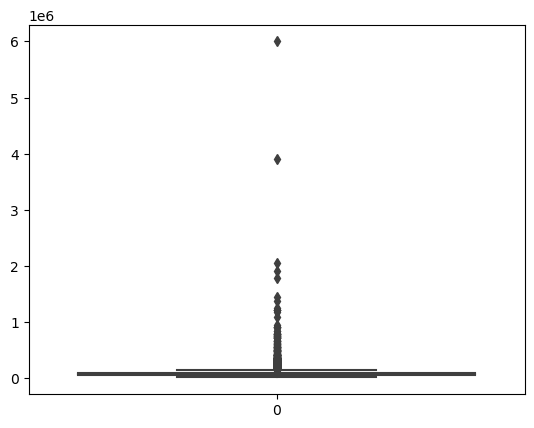

In [87]:
sns.boxplot(df['annual_inc'])

In [88]:
#We can clearly see there are outliers which have too high values in it
#So removing Them
quantile_data = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_data

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [89]:
#As we can see the values after 95 is not connected to the other values
# So removing the data higher than 95%
above_95_annual_inc = df['annual_inc'].quantile(0.95)
df= df[df.annual_inc <= above_95_annual_inc]


<Axes: >

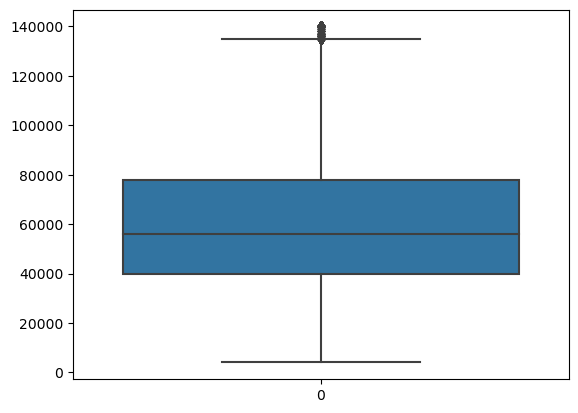

In [37]:
sns.boxplot(df.annual_inc)

<Axes: >

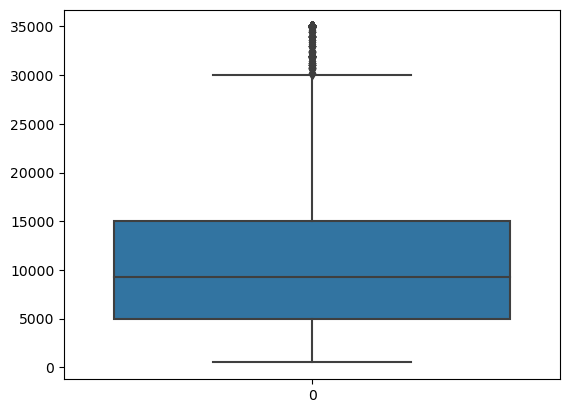

In [90]:
#Now annual_inc looks evenly distributed
#  So moving to next column
sns.boxplot(df.loan_amnt)

In [91]:
quantile_data_loan_Amnt = df.loan_amnt.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_data_loan_Amnt

0.50     9250.0
0.75    15000.0
0.90    20000.0
0.95    25000.0
0.97    25475.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

In [332]:
# As some values are too far from common value but still we will not delete these data as these are loan amount
# and it could be not be outliers

<Axes: >

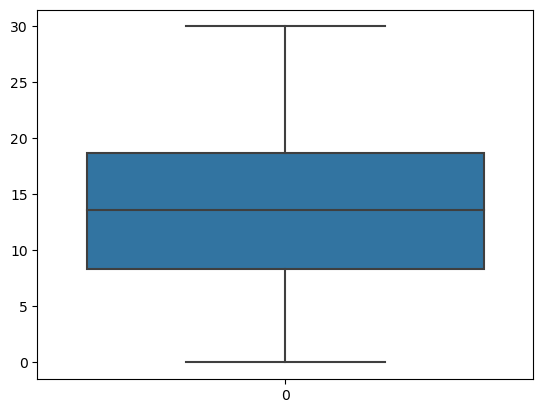

In [92]:
sns.boxplot(df.dti)


In [334]:
# As we can see there is no outliers for the dti data

<Axes: >

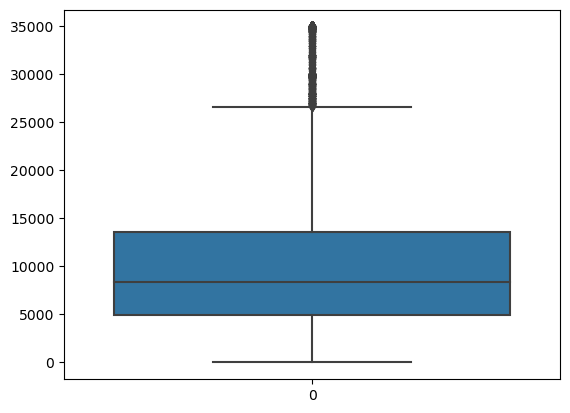

In [93]:
sns.boxplot(df.funded_amnt_inv)

In [94]:
df.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8375.000000
0.750    13623.731415
0.900    19750.000000
0.950    23941.875589
0.970    24975.000000
0.975    25350.000000
0.980    27950.000000
0.985    29925.000000
0.990    31954.028576
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

<Axes: >

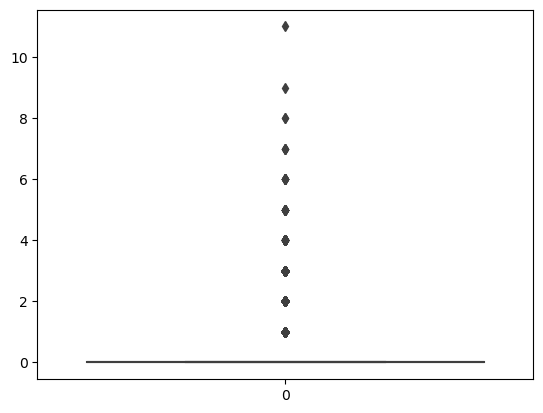

In [95]:
sns.boxplot(df['delinq_2yrs'])

<Axes: >

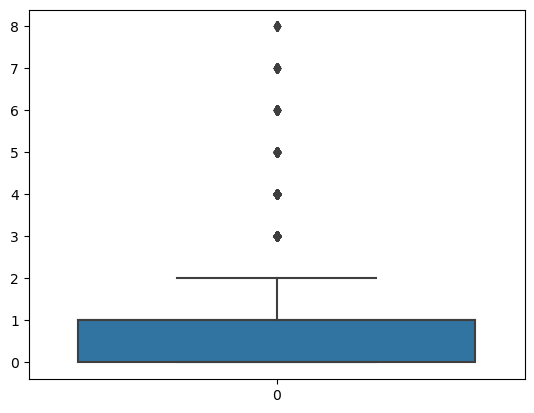

In [96]:
sns.boxplot(df['inq_last_6mths'])

<Axes: >

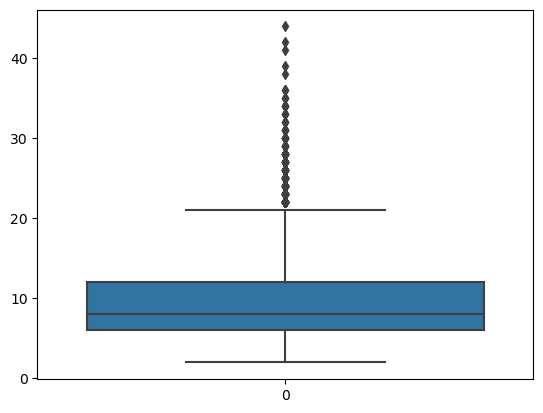

In [97]:
sns.boxplot(df['open_acc'])

<Axes: >

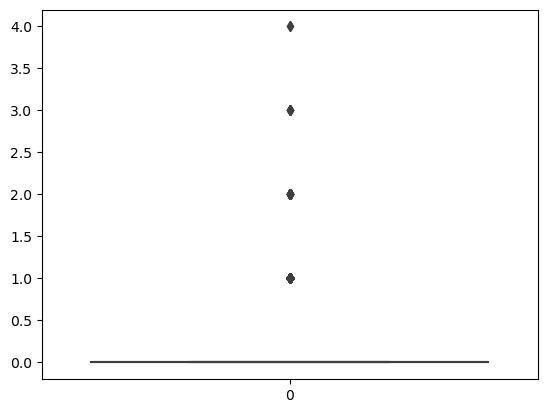

In [98]:
sns.boxplot(df['pub_rec'])

<Axes: >

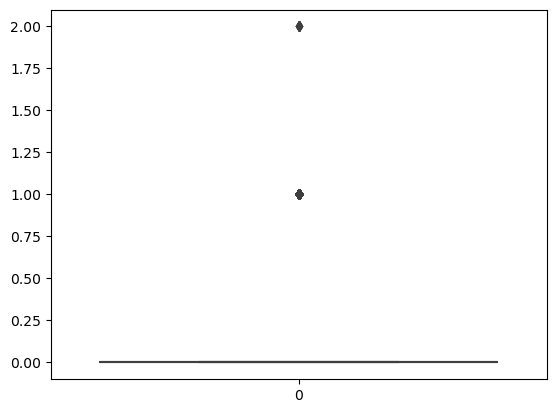

In [99]:
sns.boxplot(df['pub_rec_bankruptcies'])

# Data conversion to the required format

In [100]:
df['int_rate'] = df['int_rate'].apply(lambda x: str(x).rstrip('%')) # to remove % from 'int_rate' column
df['revol_util'] = df['revol_util'].apply(lambda x: str(x).rstrip('%')) # to remove % from 'int_rate' column
df['emp_length'] = df['emp_length'].apply(lambda x: str(x).rstrip(' years')) # to remove years from 'emp_length'
df.rename(columns = {'emp_length' : 'exp_in_years'}, inplace= True) # changing 'emp_length' to 'exp_in_years'
df['exp_in_years'] = df['exp_in_years'].apply(lambda x: str(x).rstrip('+').lstrip('< ')) # to remove + and < from exp_in_years
df['exp_in_years'] =df['exp_in_years'].astype(int) 

In [101]:
#creating bins for int_rate,open_acc,revol_util,total_acc,dti
df['dti_groups'] = pd.cut(df['dti'].astype(float),bins = 5,precision =0,labels=['5-9','9-13','13-17','17-21','21-24'])
df['int_rate_groups'] = pd.cut(df['int_rate'].astype(float),bins = 5,precision =0,labels=['5-9','9-13','13-17','17-21','21-24'])
df['open_acc_groups'] = pd.cut(df['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-28','28-36','36-44'])
df['revol_util_groups'] = pd.cut(df['revol_util'].astype(float), bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
df['total_acc_groups'] = pd.cut(df['total_acc'], bins=5,precision =0,labels=['2-20','20-38','38-56','56-72','72-90'])
df['annual_inc_groups'] = pd.cut(df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

# Univariate Analysis

## Univariate Analysis of continous variables



<Axes: xlabel='loan_status', ylabel='count'>

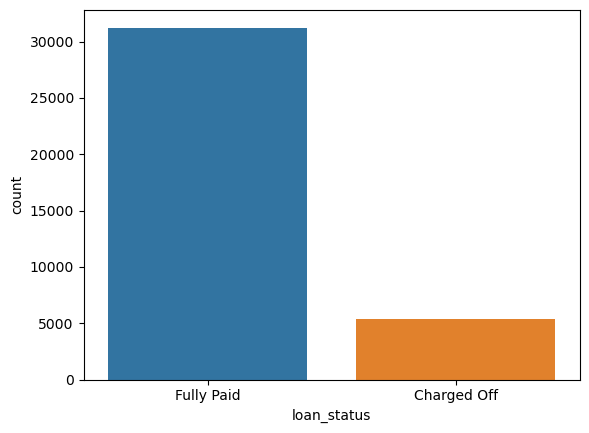

In [102]:
sns.countplot(x = 'loan_status', data = df)

# separating columns into continous columns and categorical columns.

In [128]:
#numeric or continous columns
cont_cols=['loan_amnt', 'funded_amnt_inv','installment','delinq_2yrs',
          'inq_last_6mths',
       'pub_rec','pub_rec_bankruptcies']
# categorical columns
cat_cols=['grade','home_ownership','verification_status','purpose','addr_state',
          'int_rate_groups','exp_in_years','revol_util_groups','open_acc_groups','total_acc_groups',
          'annual_inc_groups','dti_groups','term'] #loan_status not included as it will be used in analysis

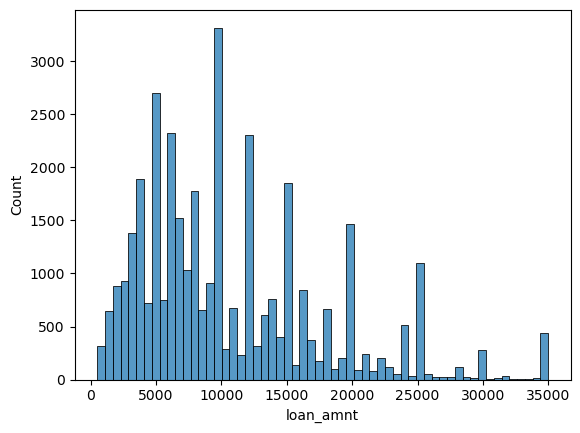

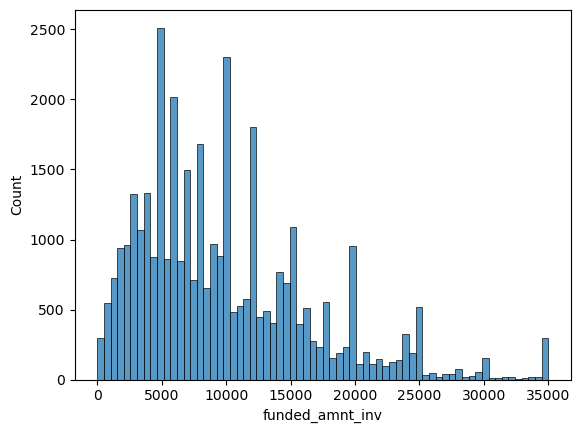

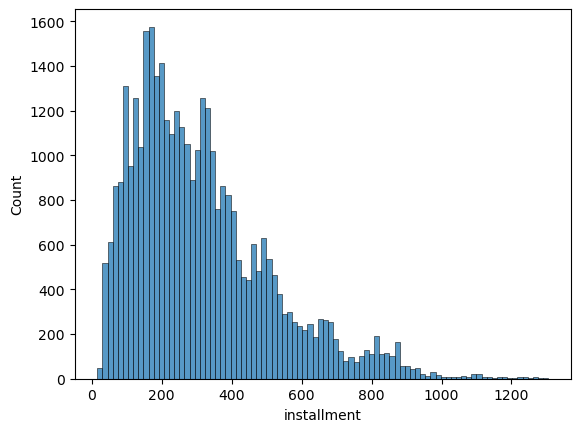

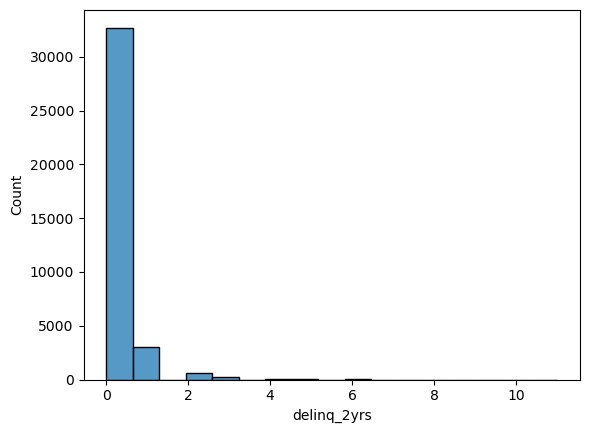

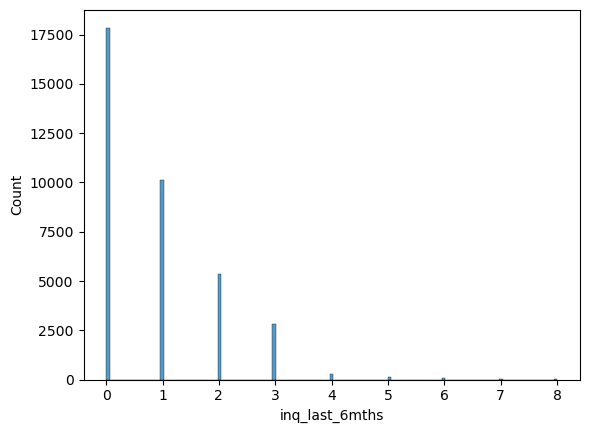

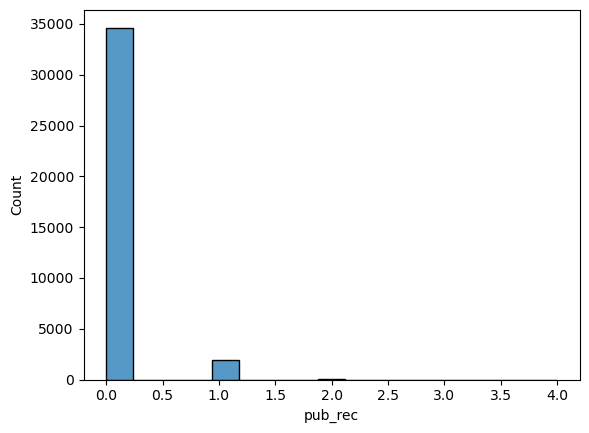

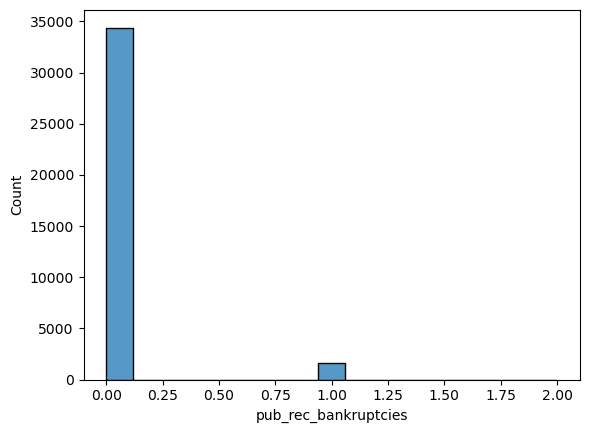

In [107]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))
for col in cont_cols:
    sns.histplot(x=df[col])
    plt.show()

## Univariate Analysis of categorical variables

### Home wonership non value should be changed to other.

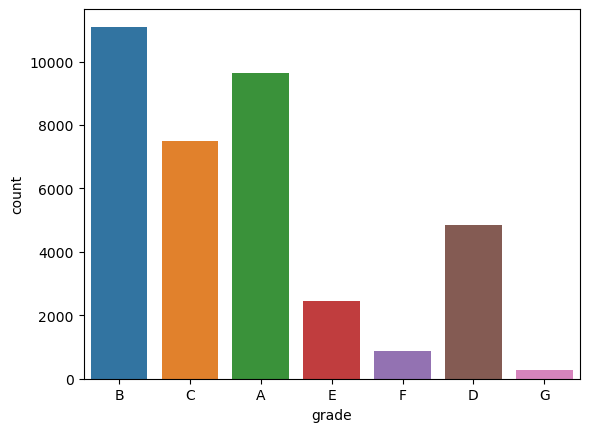

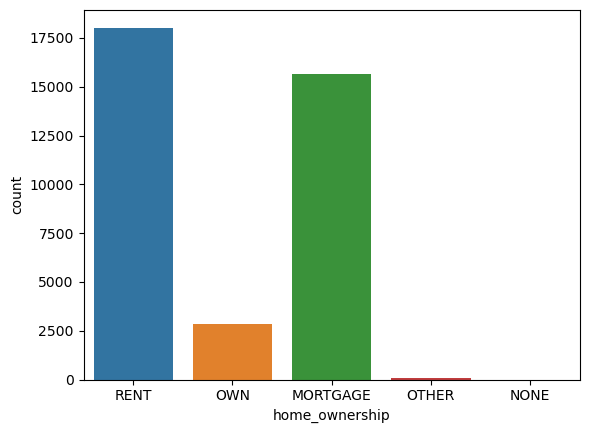

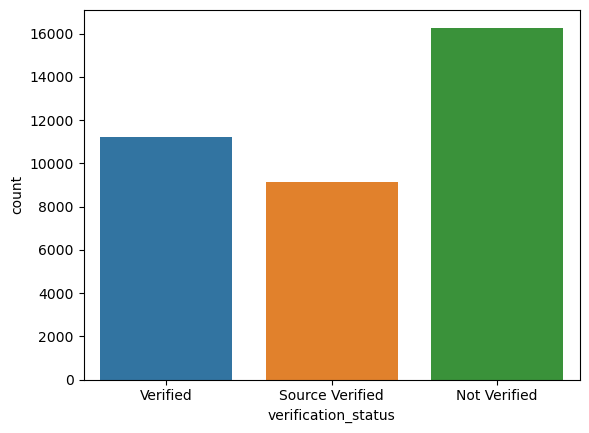

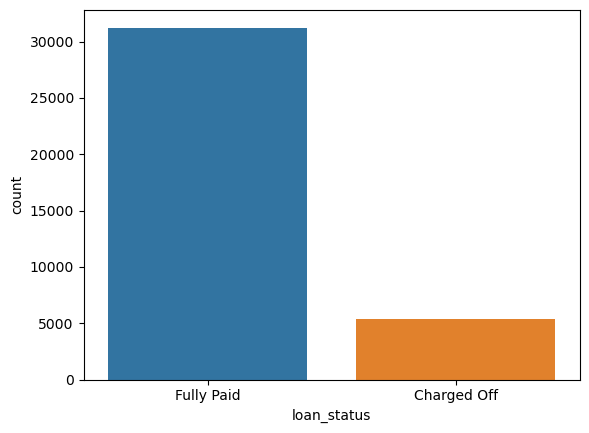

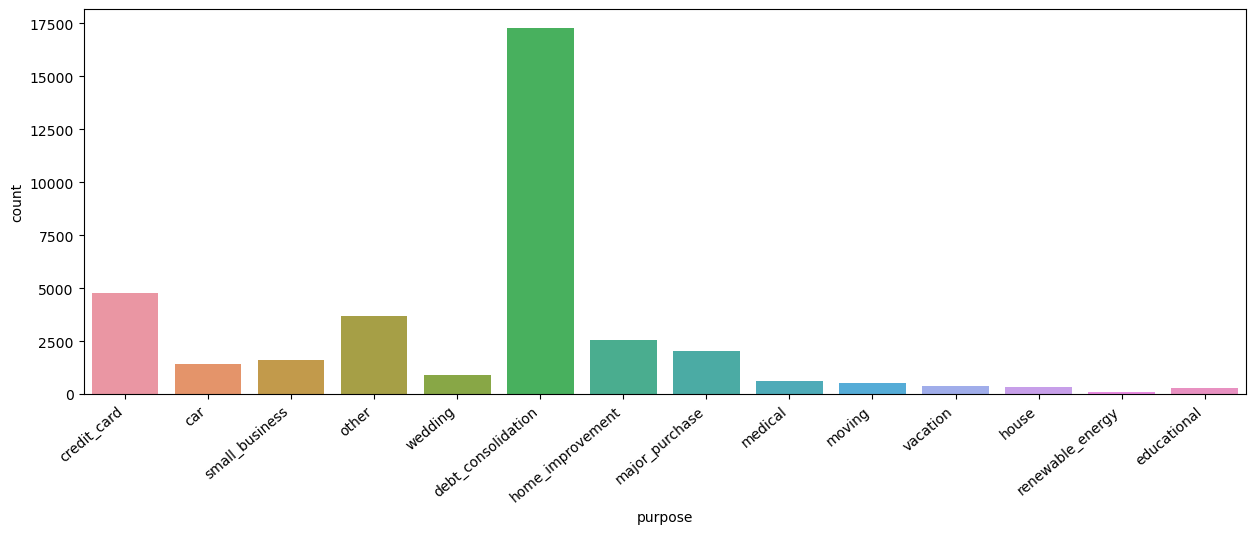

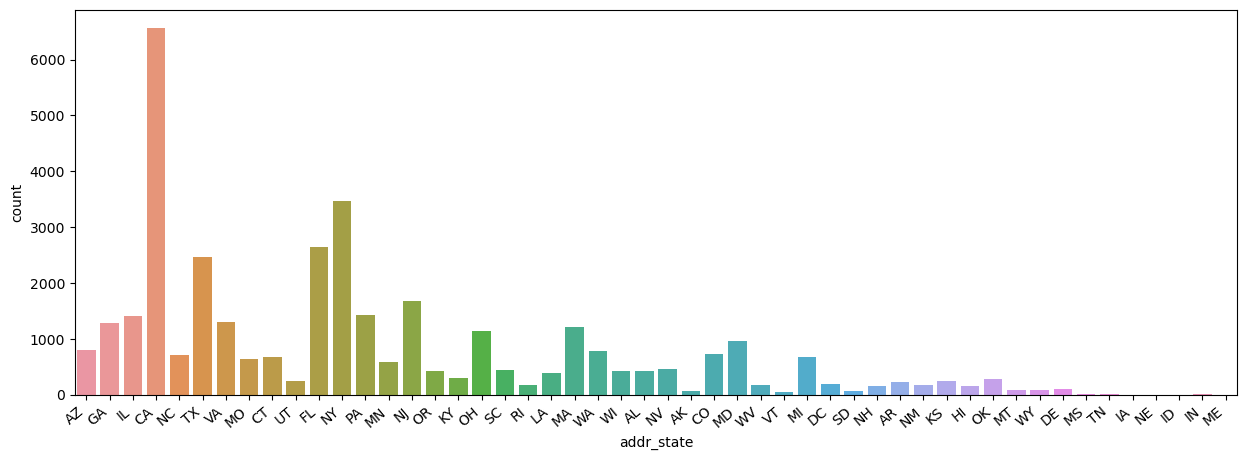

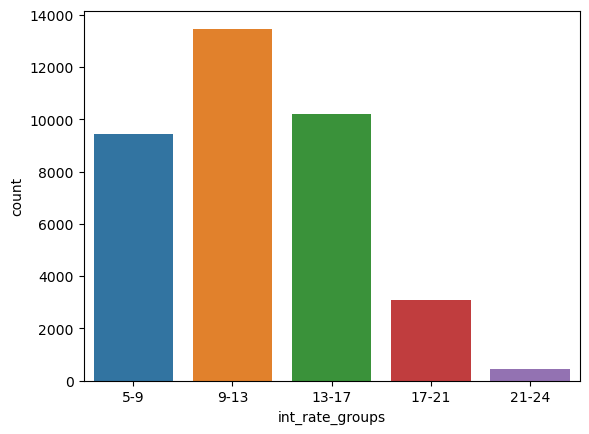

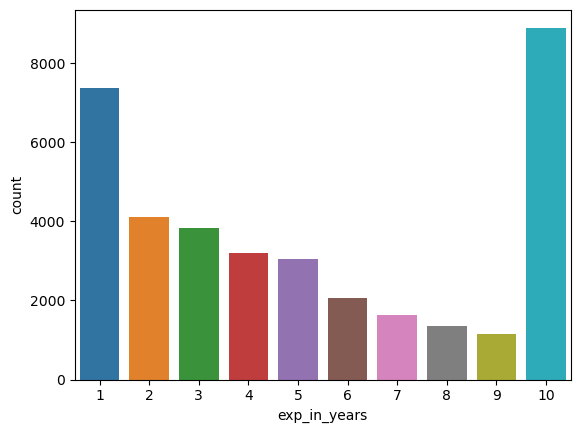

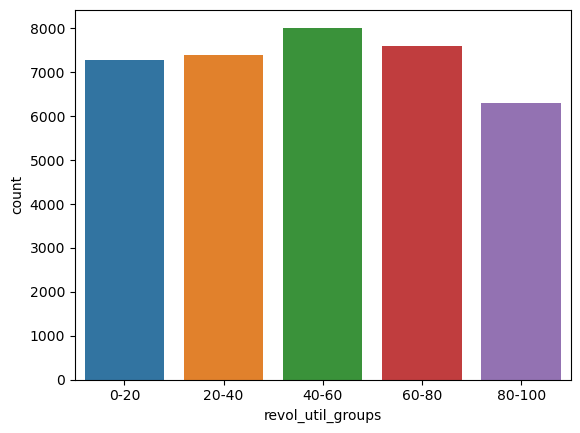

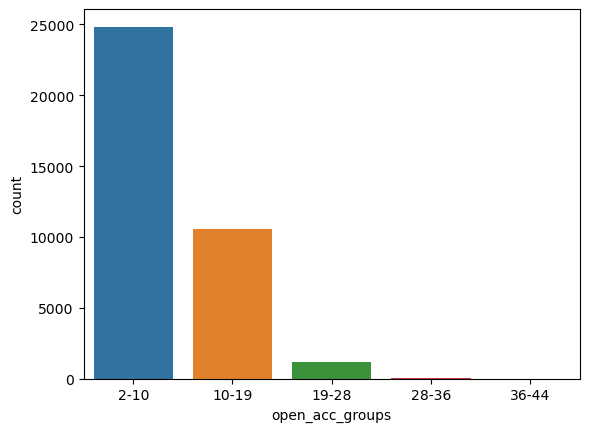

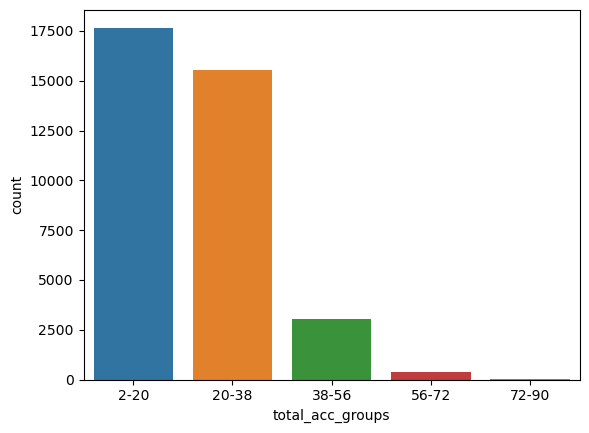

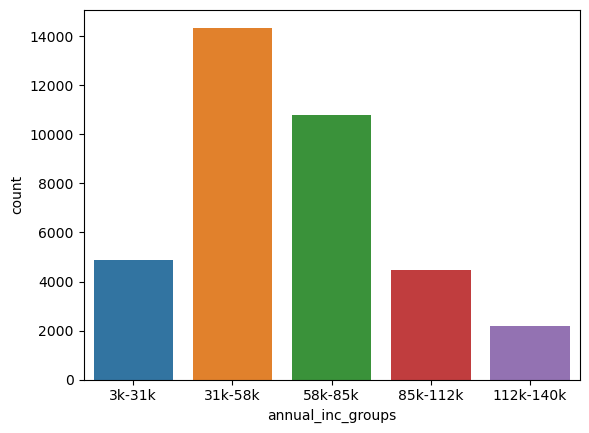

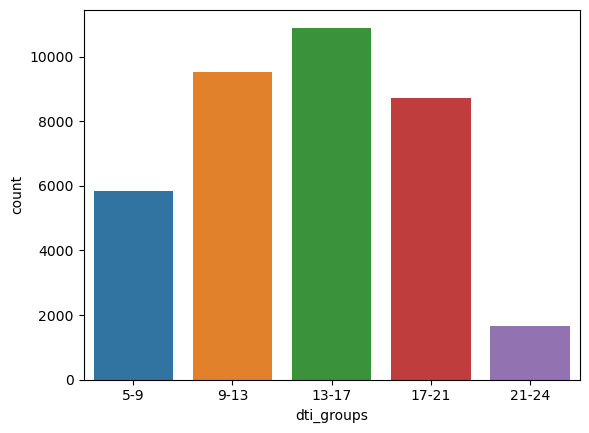

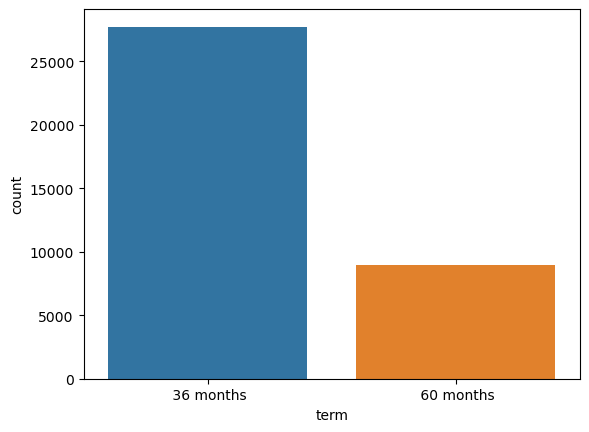

In [108]:
def plot_categorical(cols_cat,df_cat):
      for col in cols_cat:
            if (col in('addr_state','purpose')):
                   plt.figure(figsize=(15,5))
                   ax=sns.countplot(x=df_cat[col])
                   ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
            else:
                   sns.countplot(x=df_cat[col])
            plt.show()



plot_categorical(cat_cols,df)

# Segmented univariate Analysis


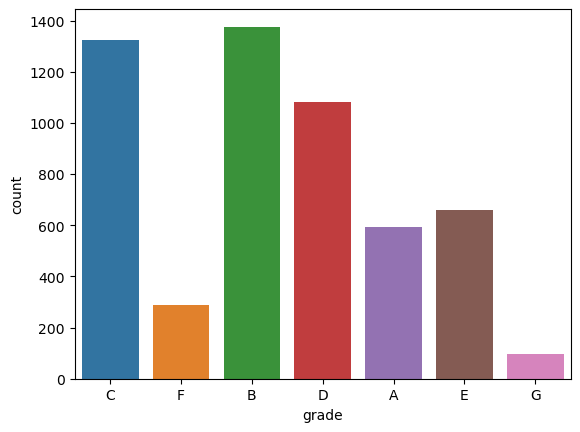

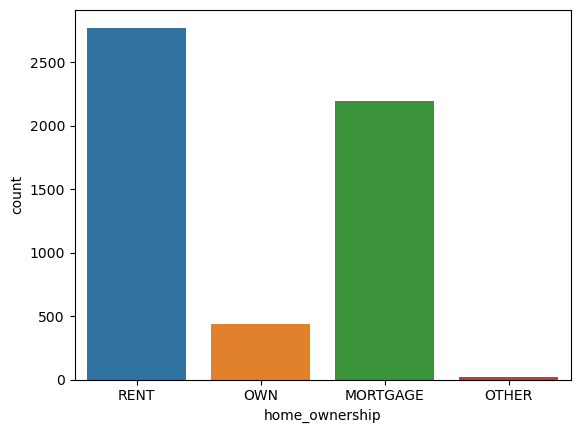

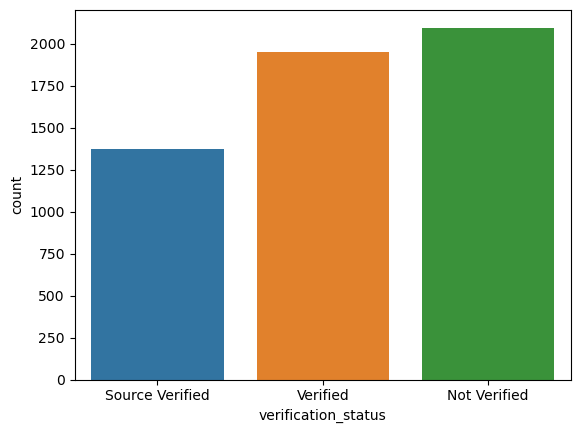

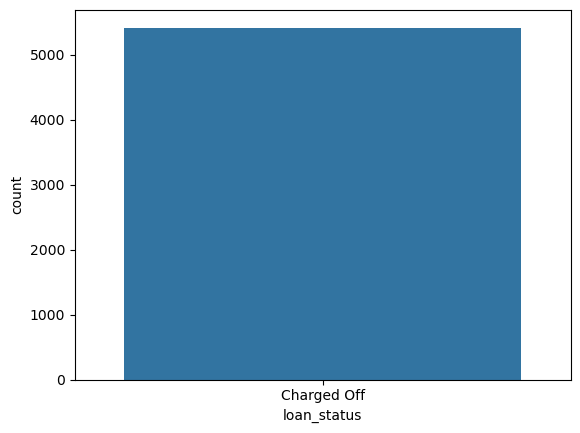

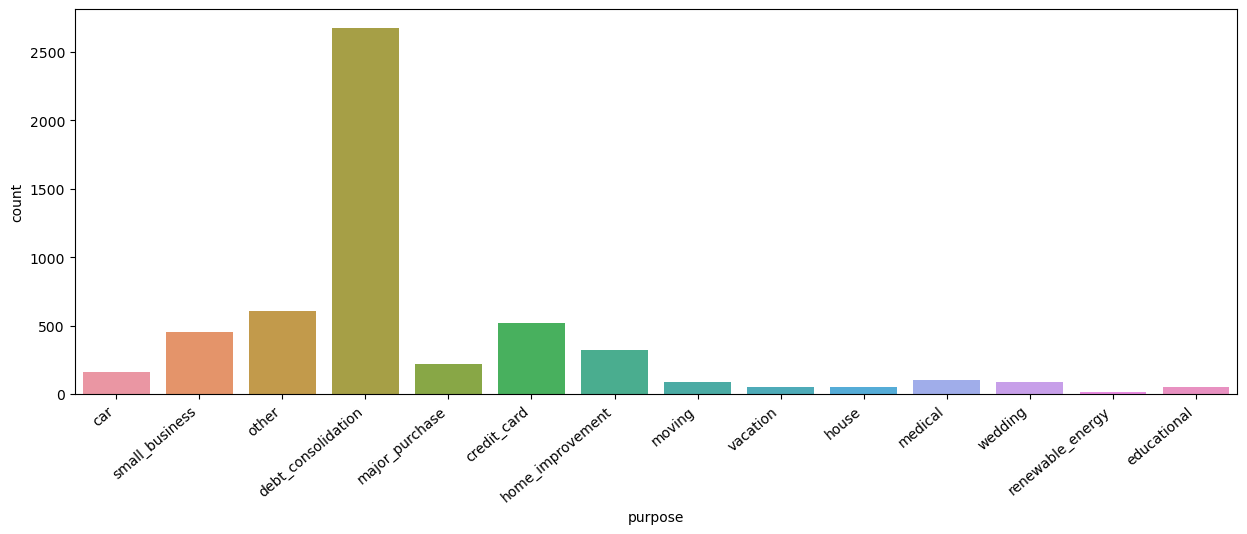

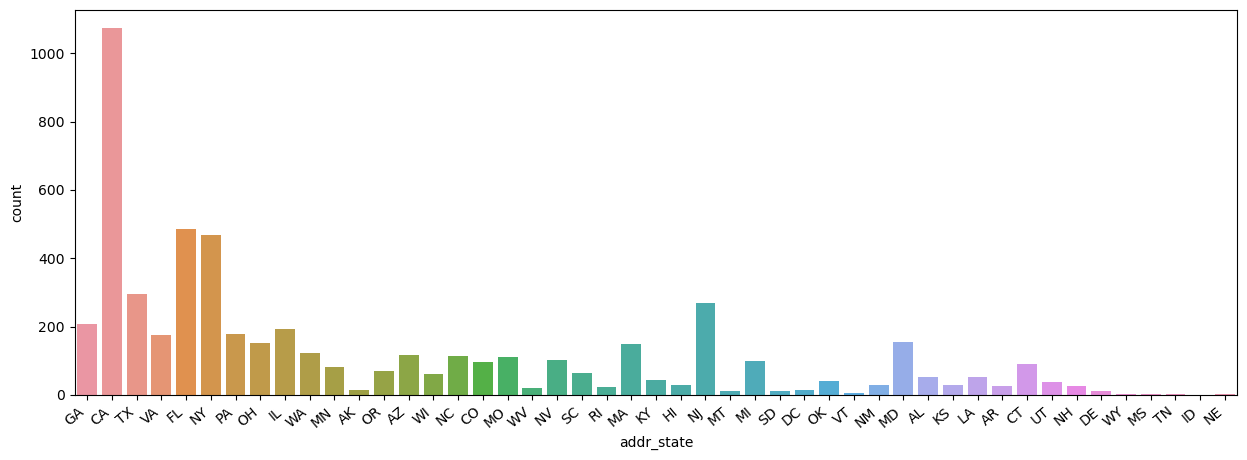

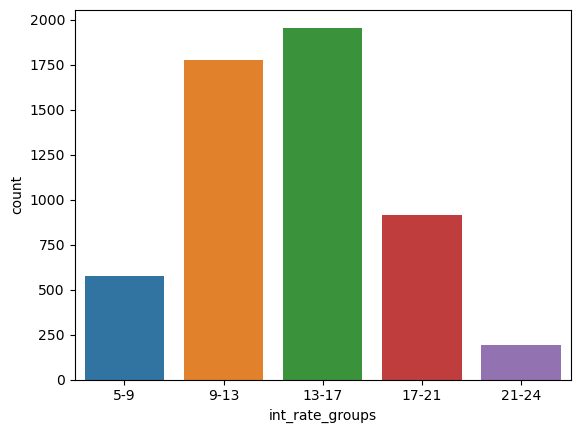

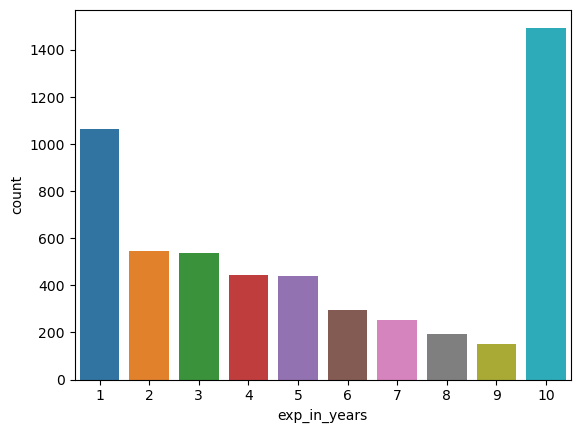

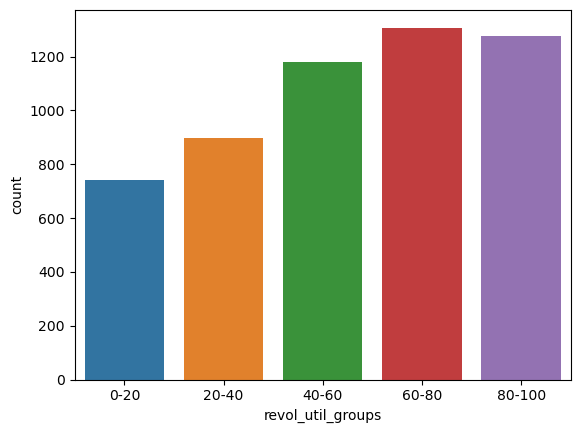

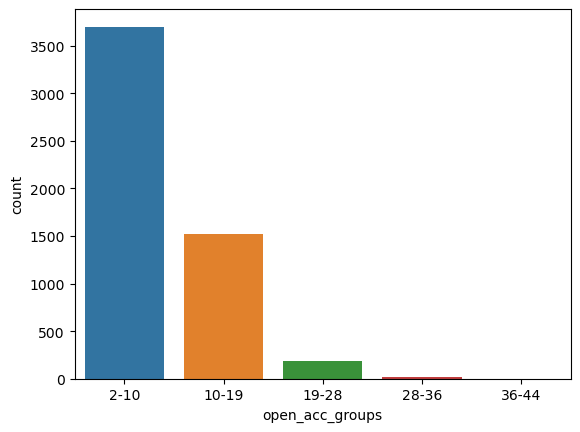

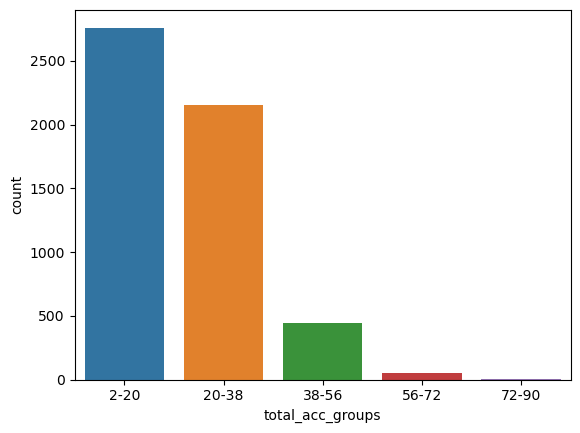

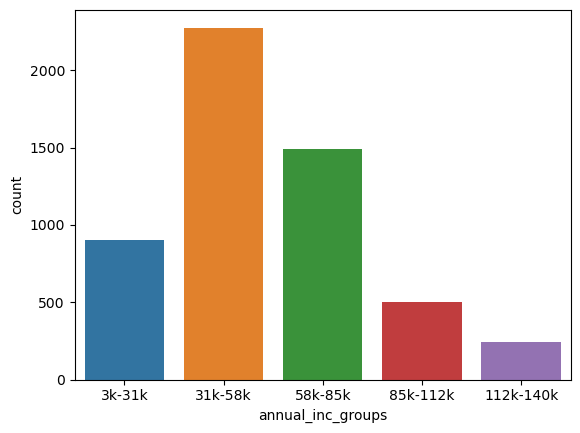

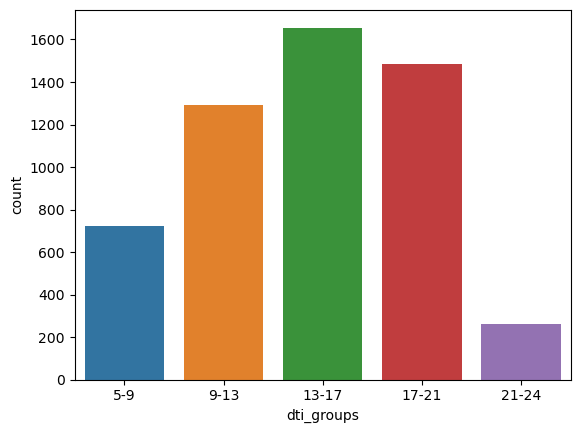

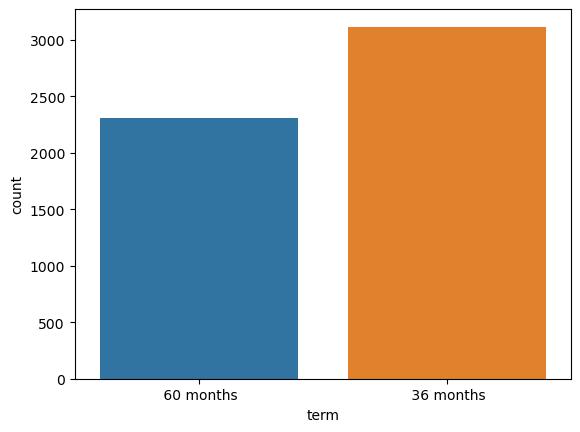

In [109]:
df_segment=df[df['loan_status']=='Charged Off']#analysing segment  charged off
plot_categorical(cat_cols,df_segment)# categorical variables segment Analysis


# Bivariate Analysis

## Loan status and continous columns

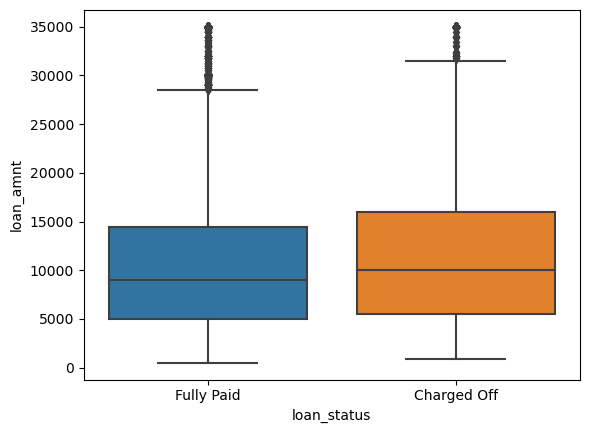

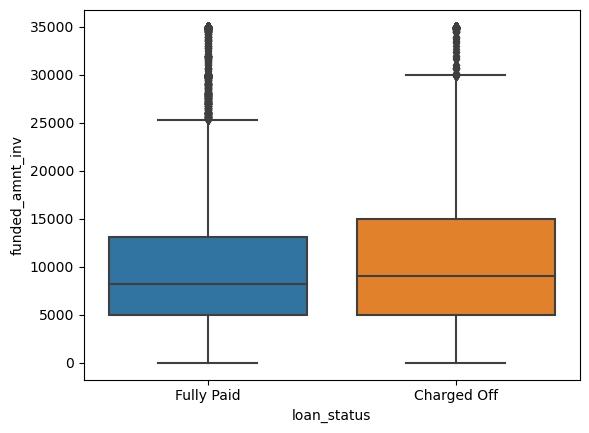

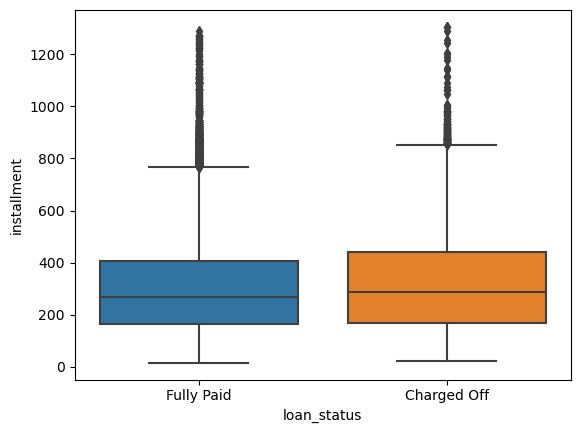

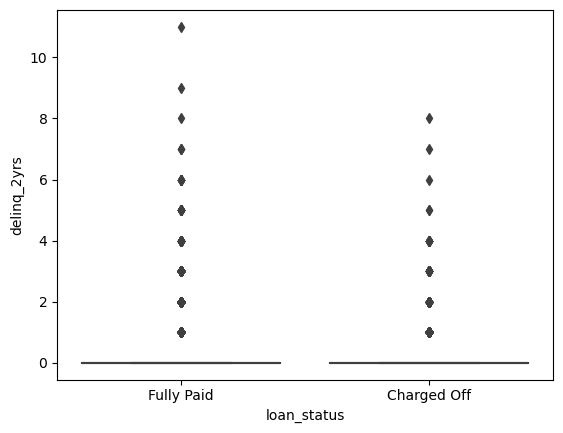

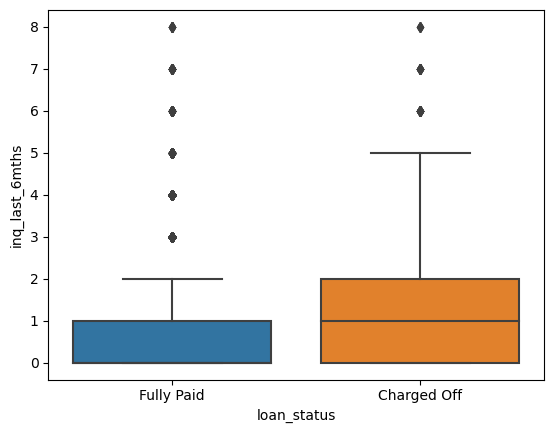

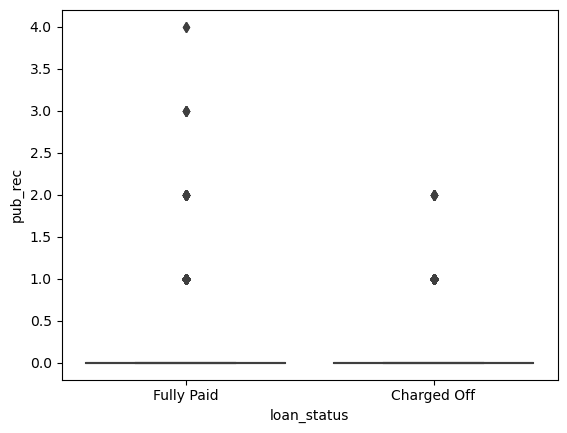

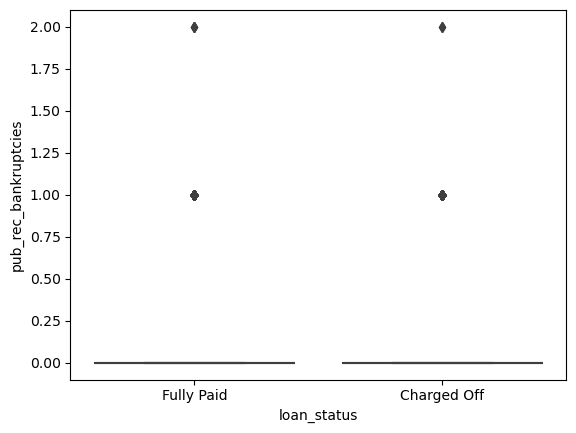

In [116]:

def bivariate_cont_vs_loan_status(cont_cols): #function for analysing loan status and continous columns.
    for col1 in cont_cols:
        sns.boxplot(x=df['loan_status'],y=df[col1])
        plt.show()

bivariate_cont_vs_loan_status(cont_cols) # calling function for  bivariate analysis



# Findings from continous variables
### Chances of default is more for :-
1.The cases for whom number of inquiries in past 6 months is more than 2 (excluding auto and mortgage inquiries).
2The total amount committed by investors for that loan at that point in time when it increases above 25000

## Loan status and other Categorical columns

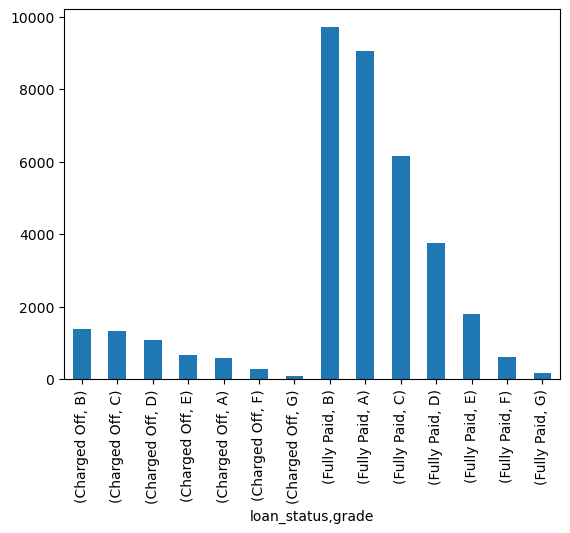

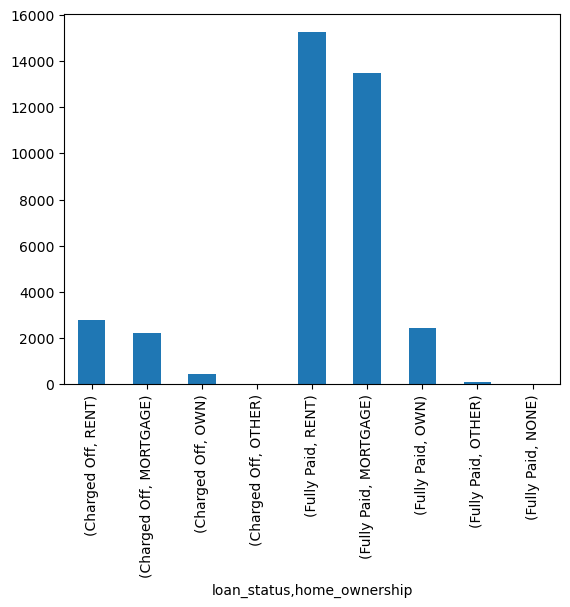

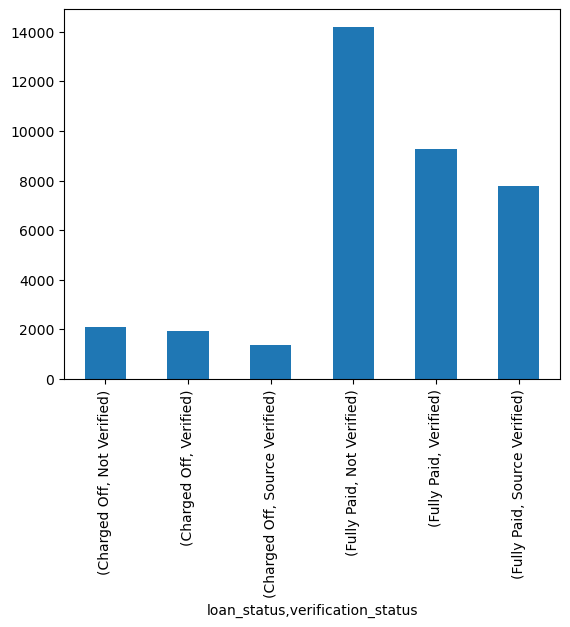

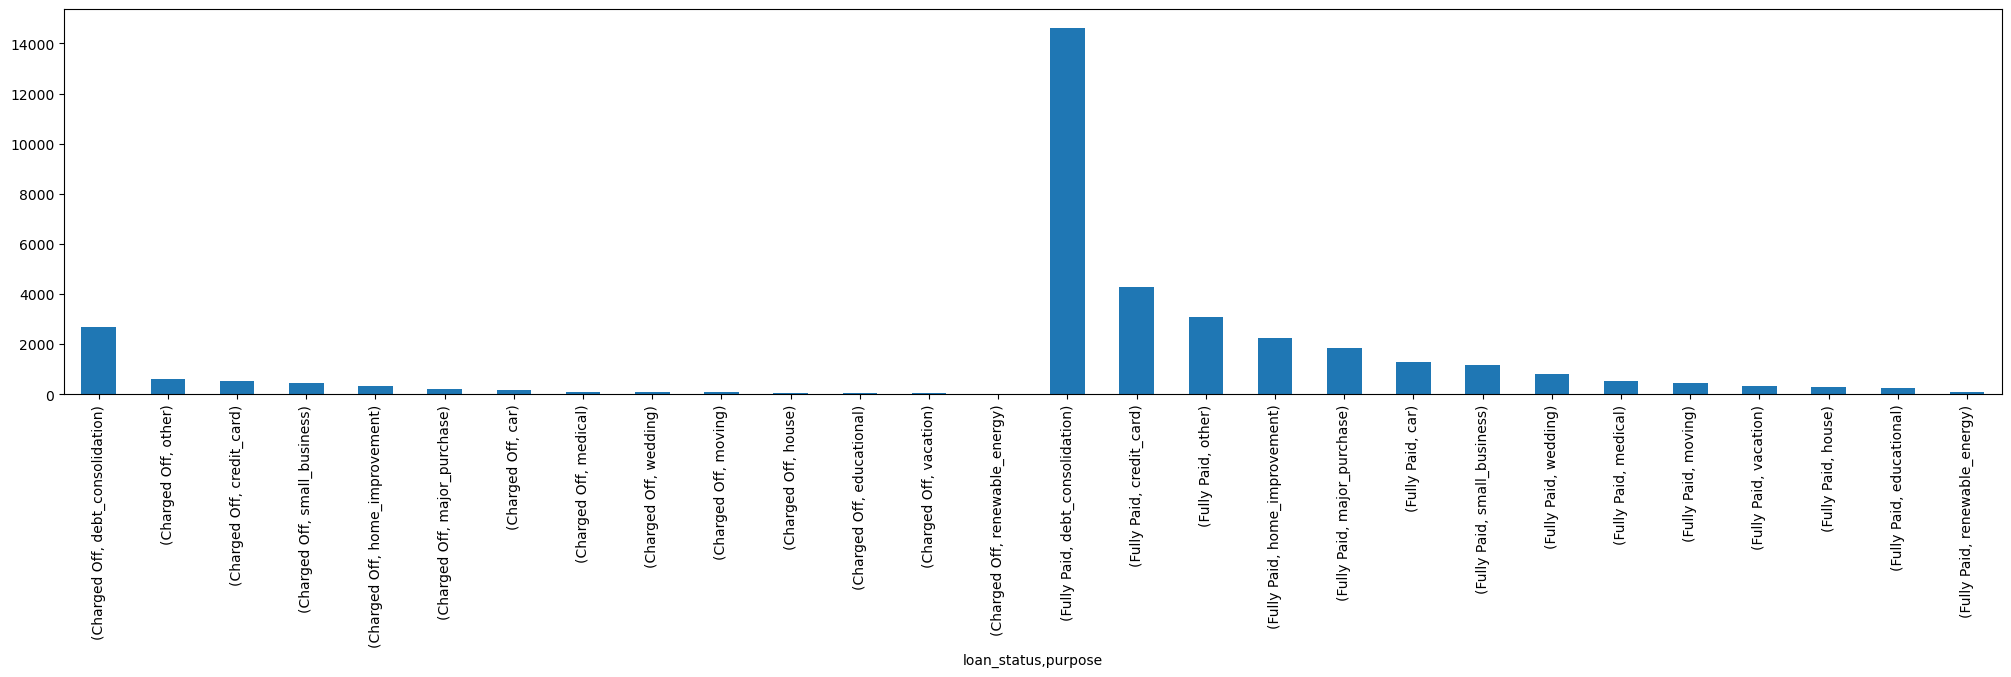

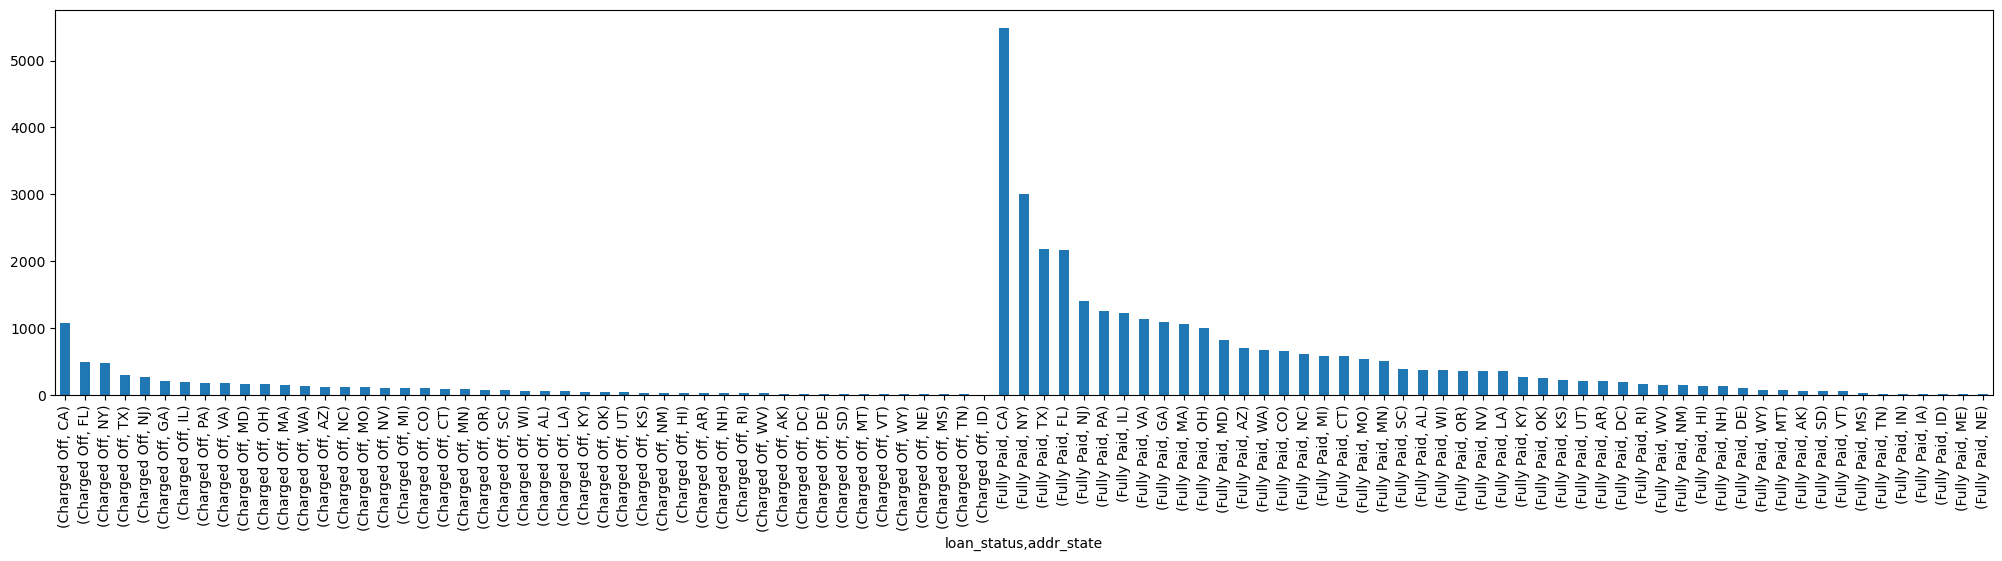

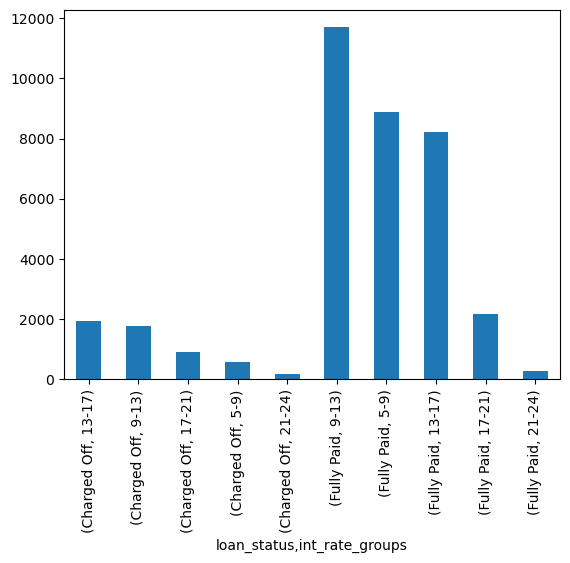

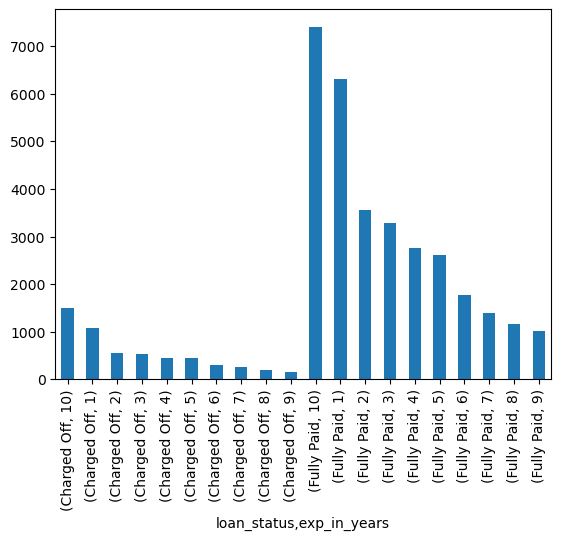

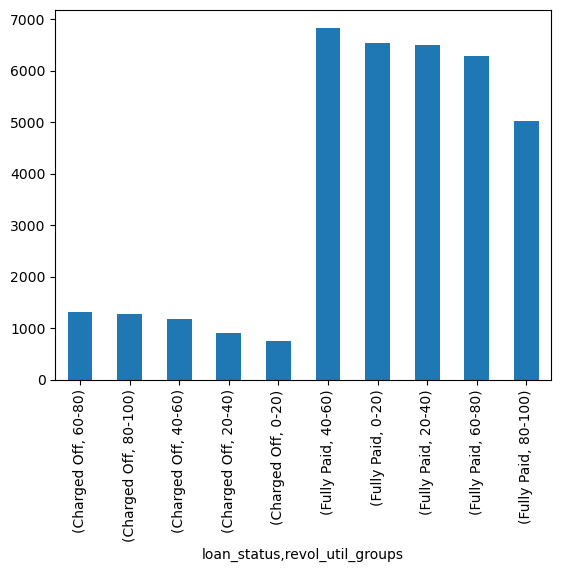

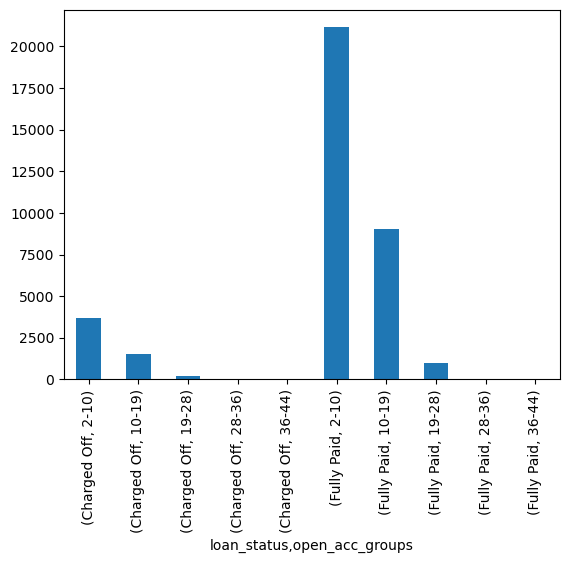

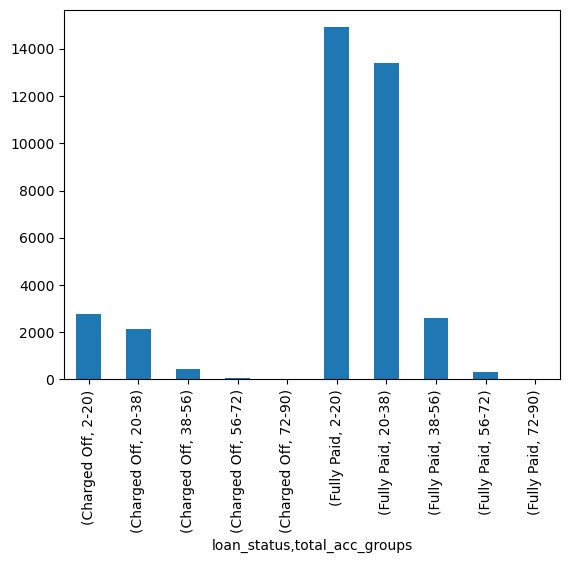

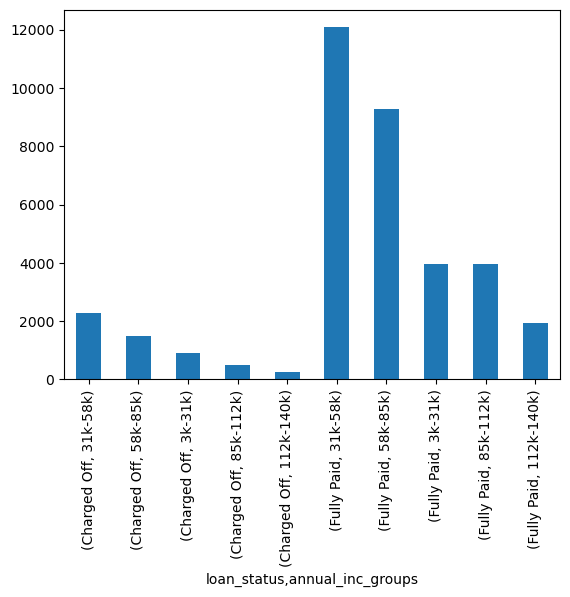

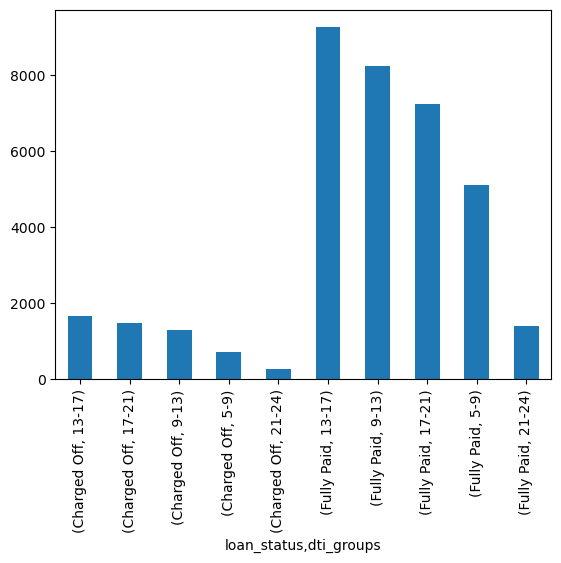

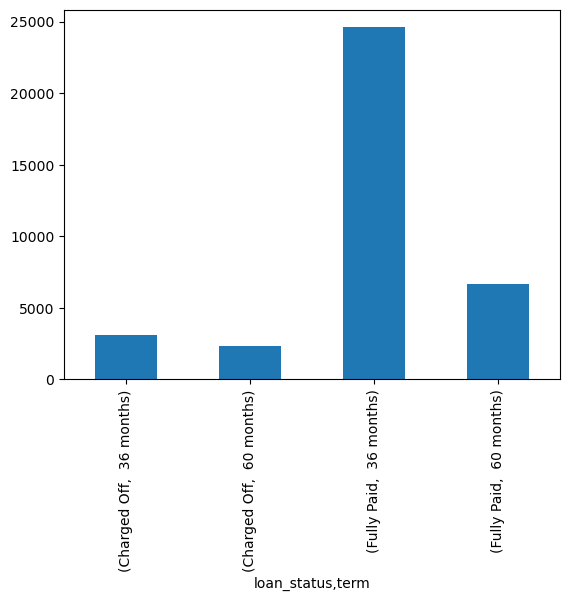

In [133]:
for cols in cat_cols:
    if (cols in('addr_state','purpose')):
        plt.figure(figsize=(25,5))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        df.groupby('loan_status')[cols].value_counts().plot.bar(stacked=True)
    else:   
        df.groupby('loan_status')[cols].value_counts().plot.bar(stacked=True)
    plt.show()

# Findings from catagorical variable bivariate Analysis
## Chances of default increases:
### 1 Loan term is 36 months
### 2.A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.(dti) is between 13 to 17
### 3.Person whose Annual income is between 31k-58K is more likely to be defaulter.
### 4.People staying on rent are more likely to default.
### 5 People mostly takes loan for debt consolidation and they are the mostly defaulters.
### 6.CA location default is more likely to default.
### 7.Experience of more than 10 years default more.
### 8.The number of open credit lines in the borrower's credit file, when it is between 2 to 10 has most defaulter.
### 9.The total number of credit lines currently in the borrower's credit file between 2 to 20 has more defaulter.





## Multivariate Analysis

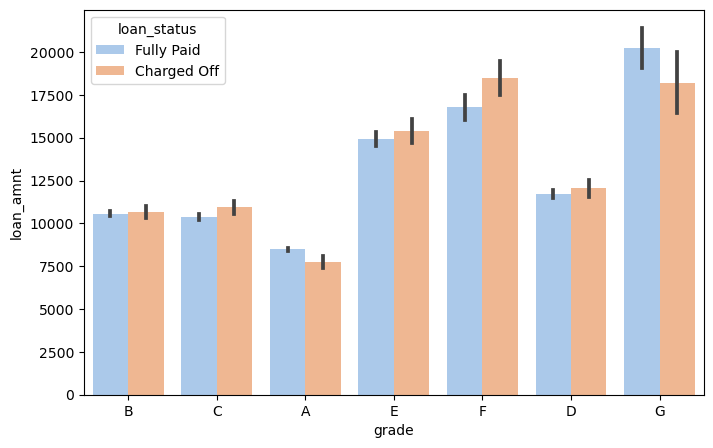

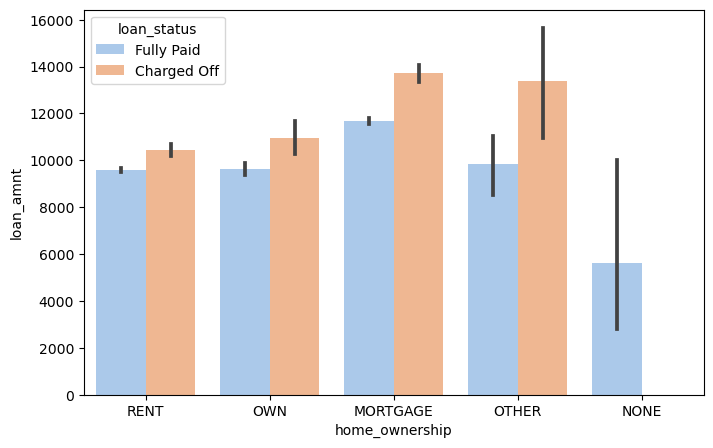

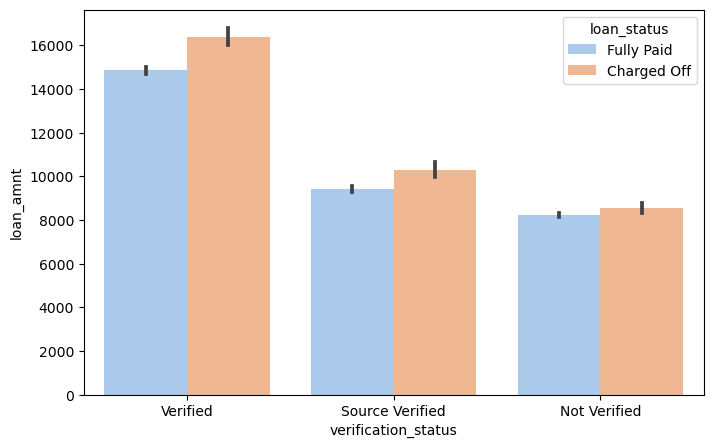

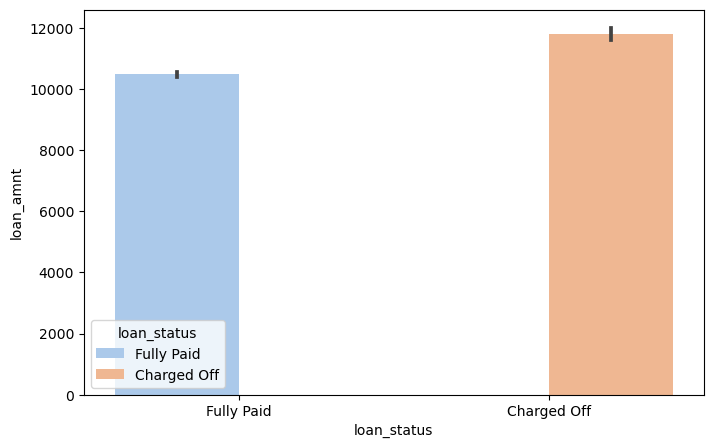

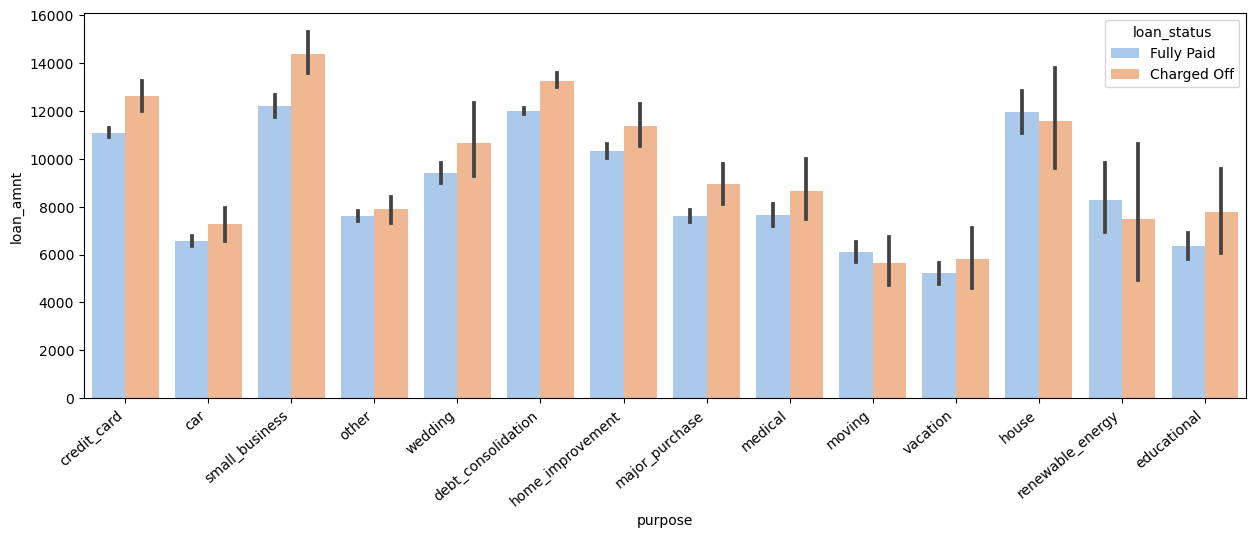

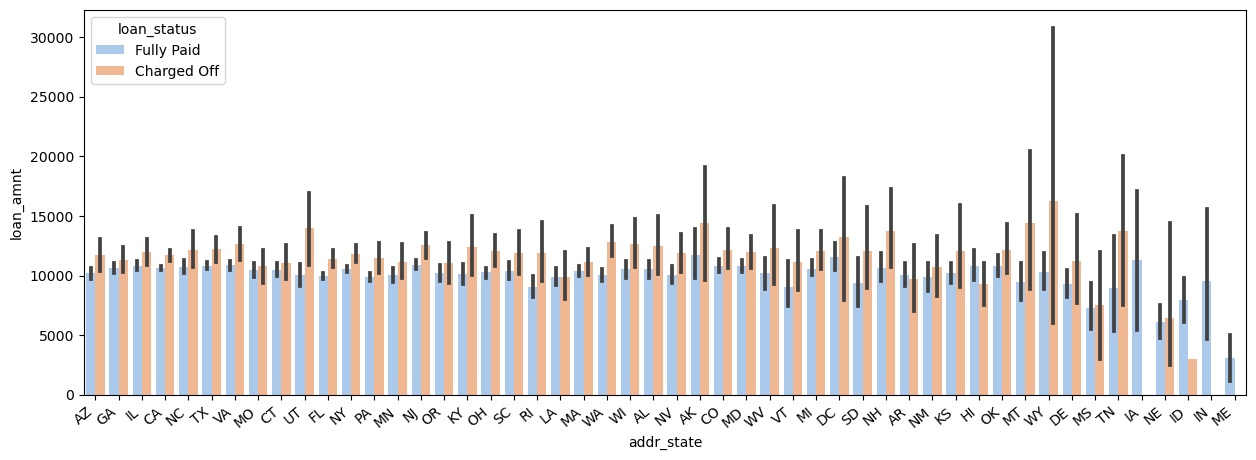

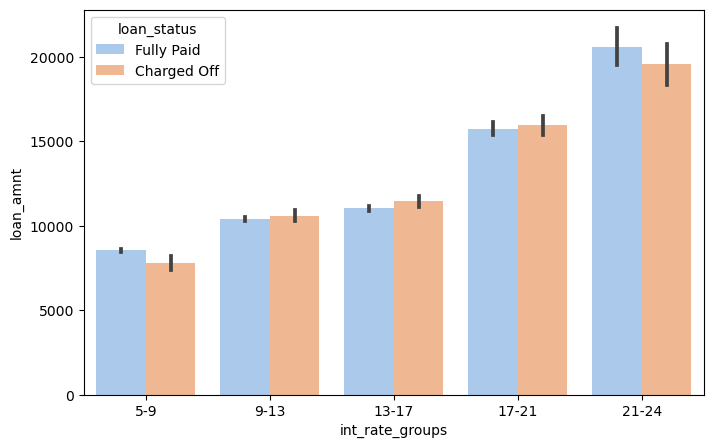

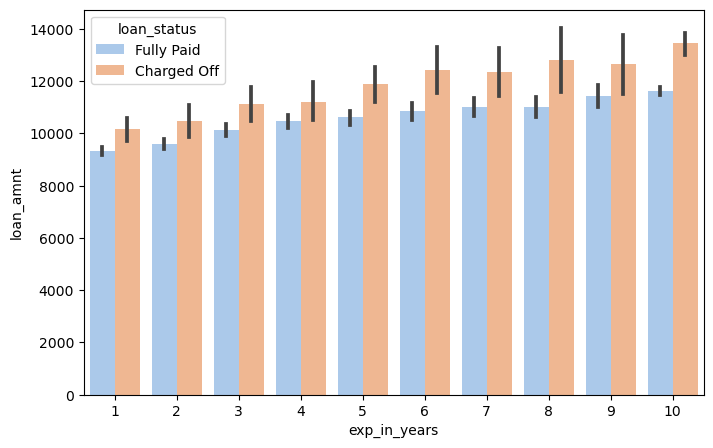

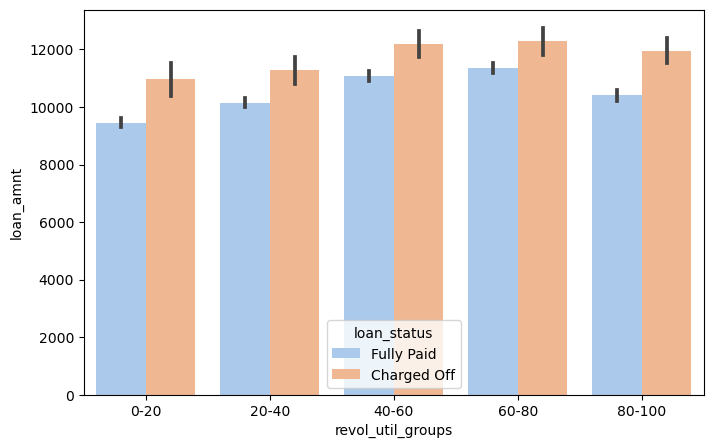

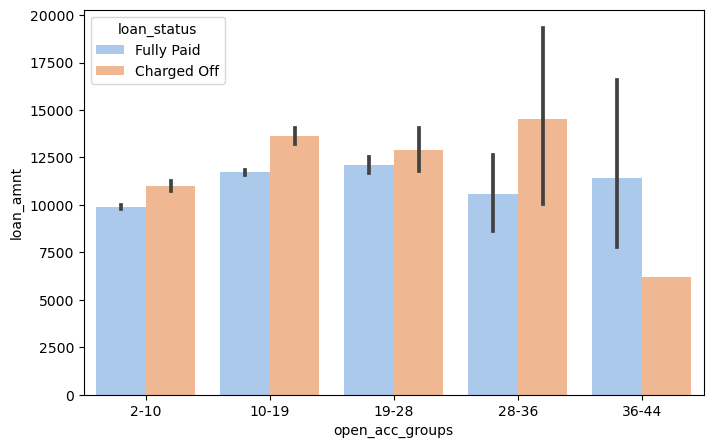

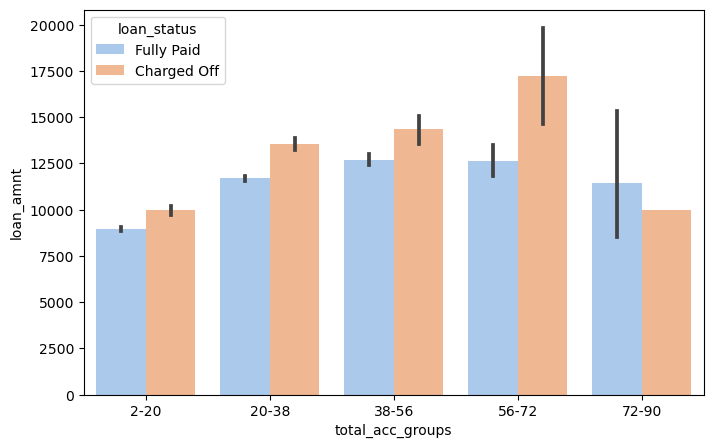

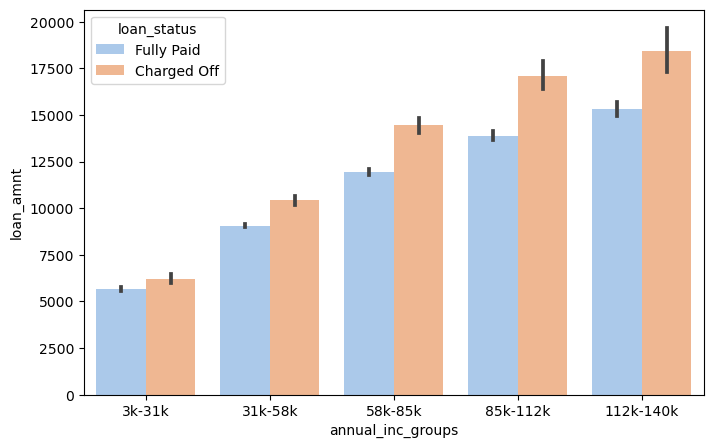

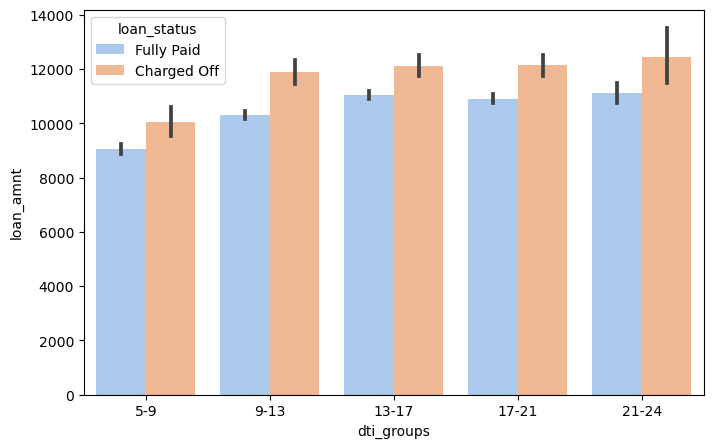

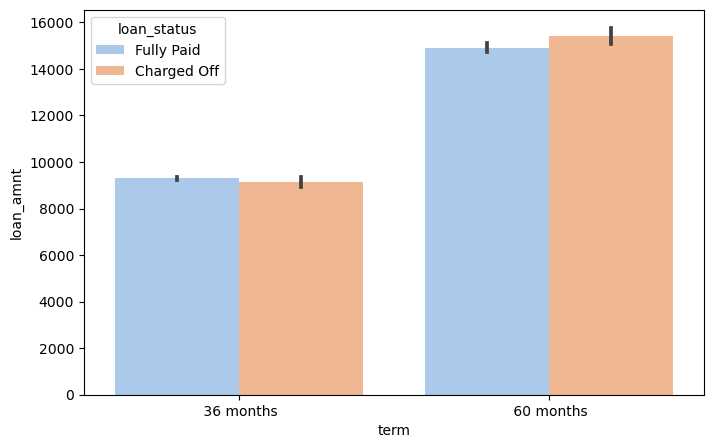

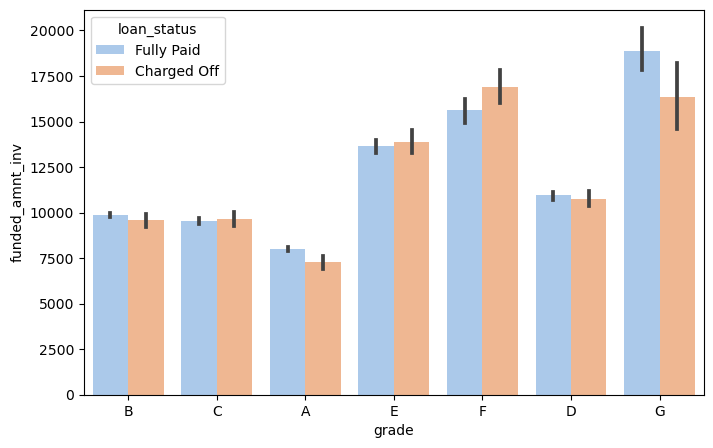

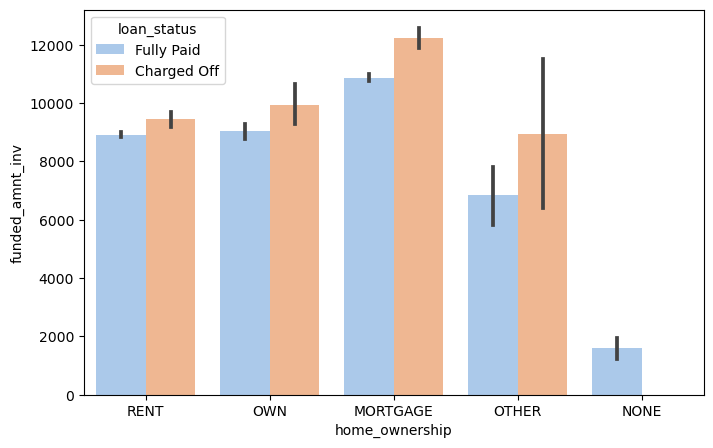

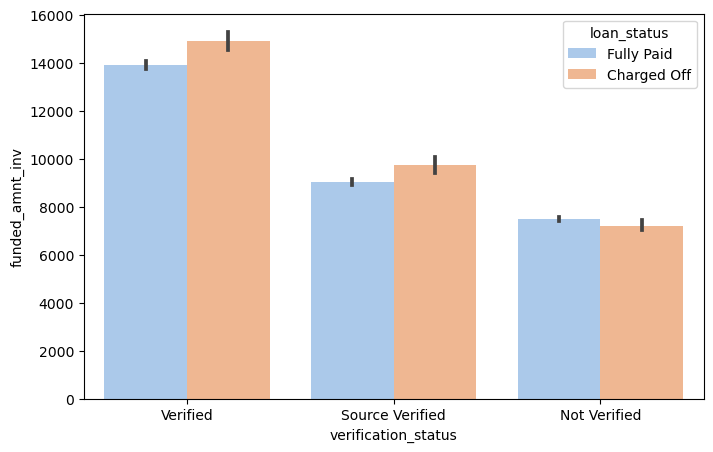

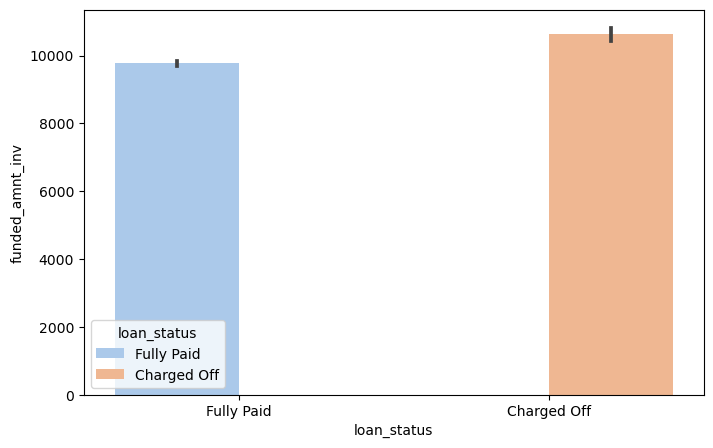

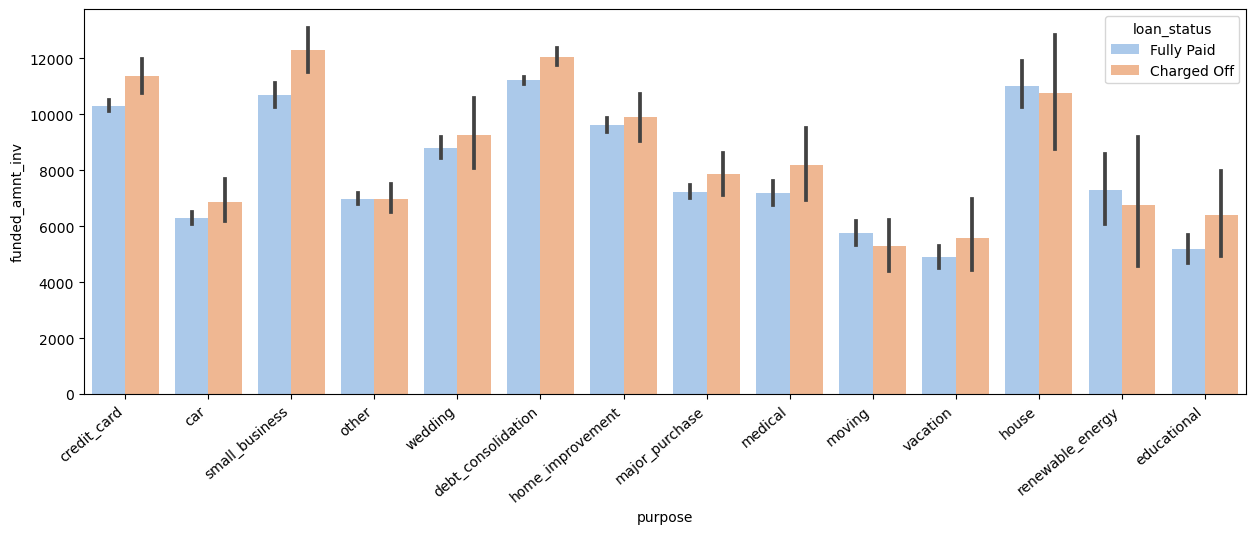

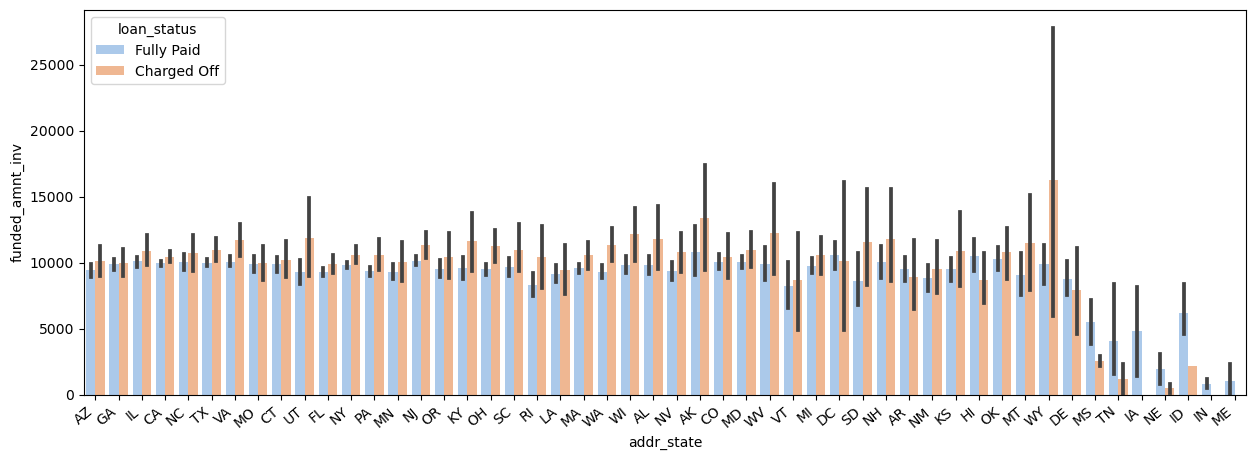

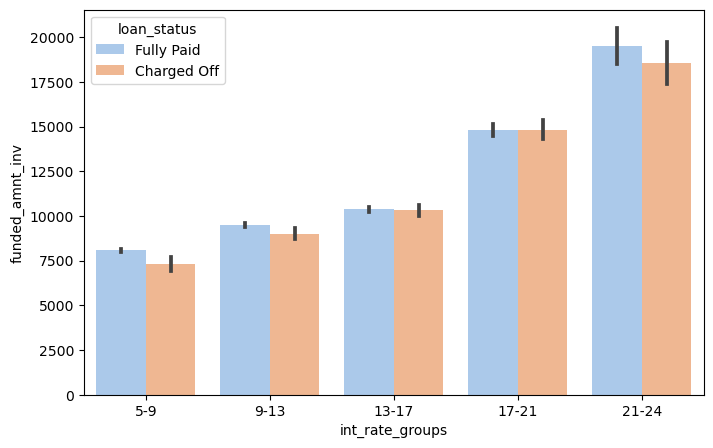

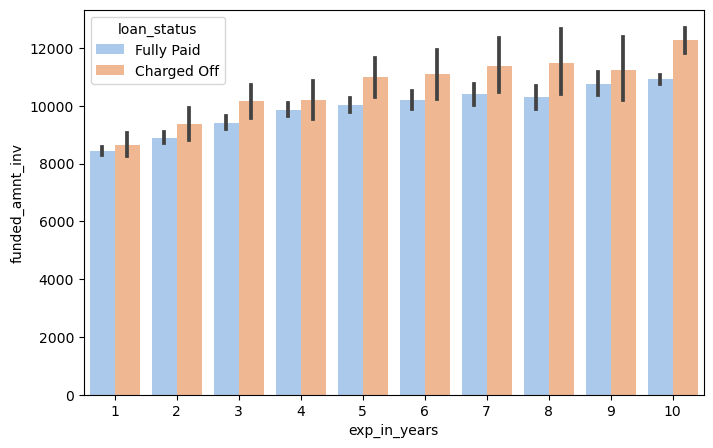

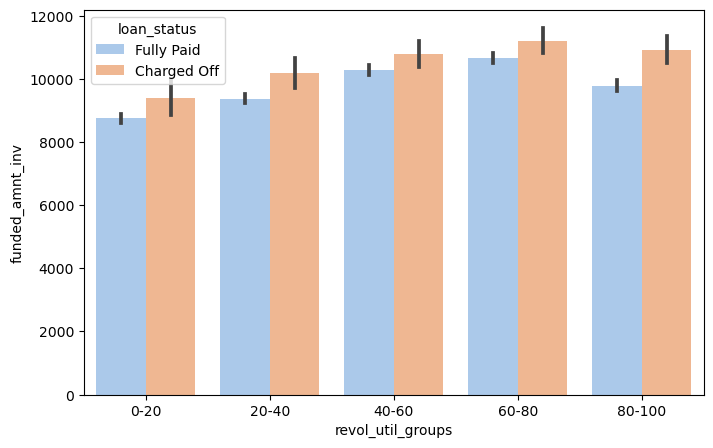

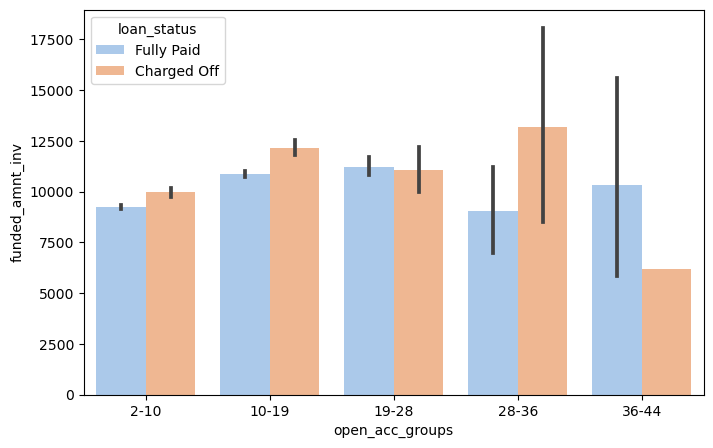

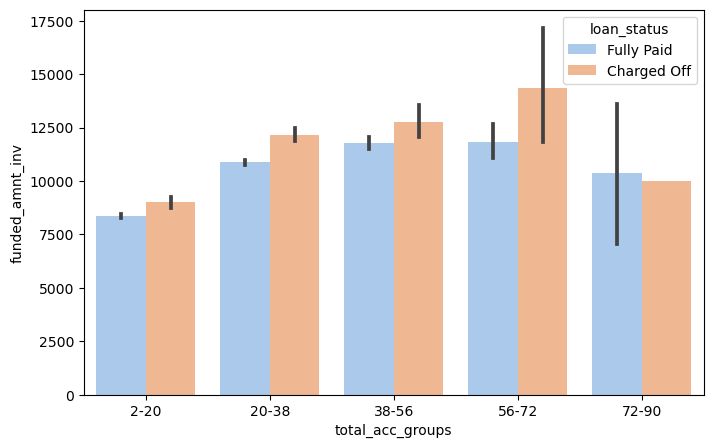

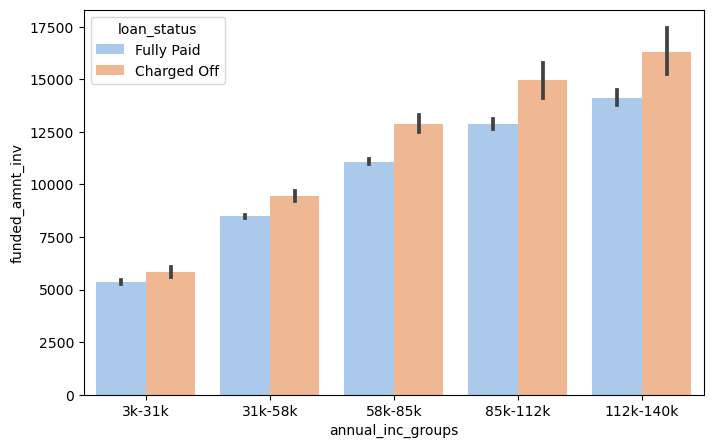

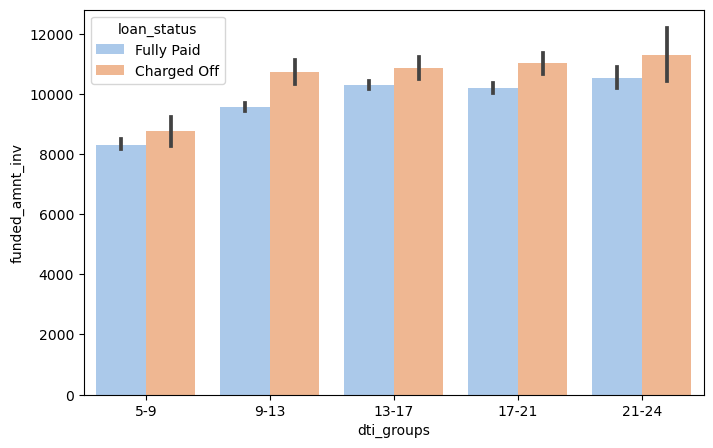

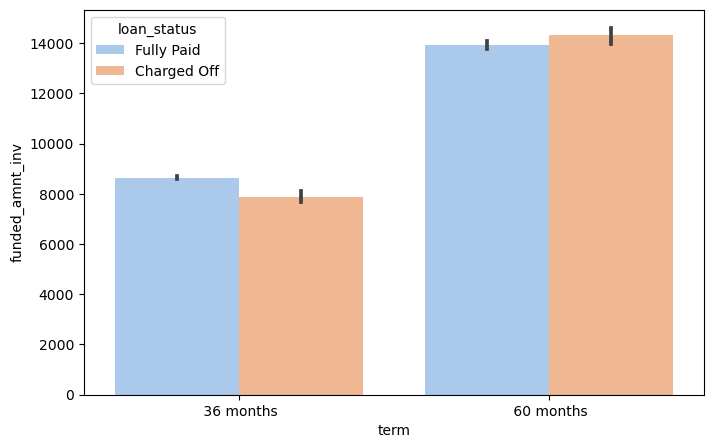

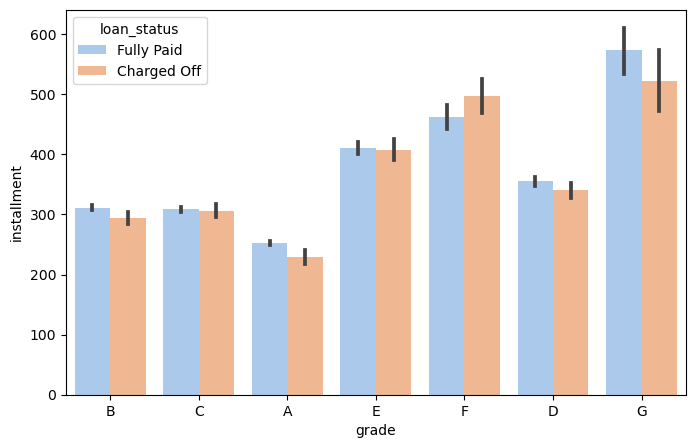

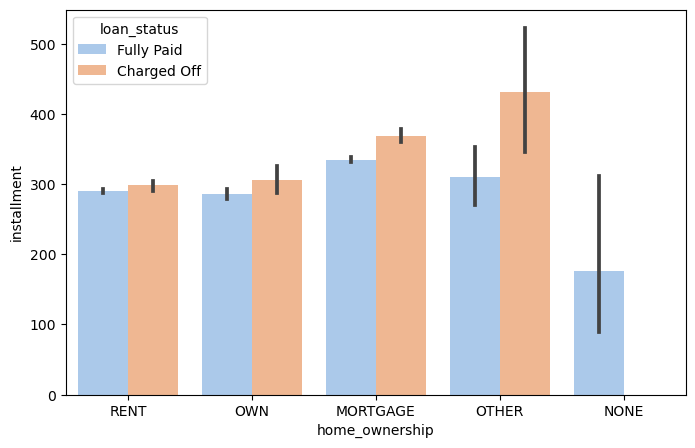

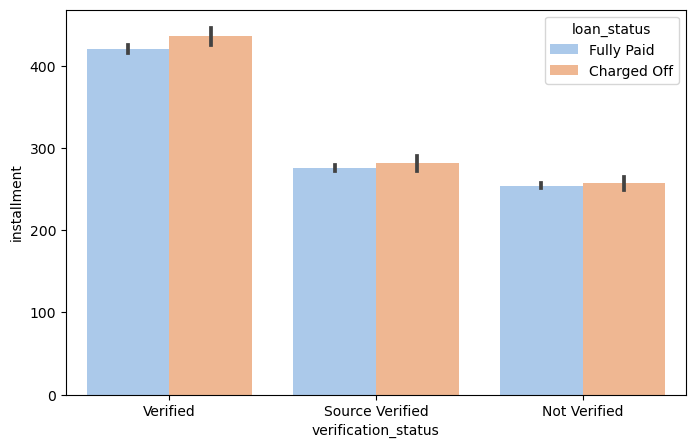

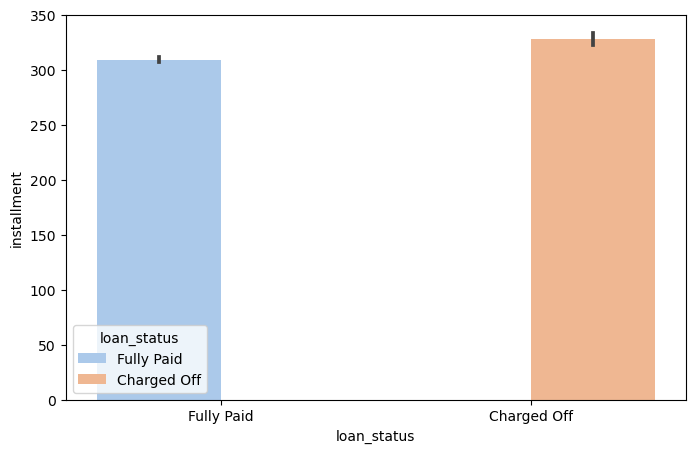

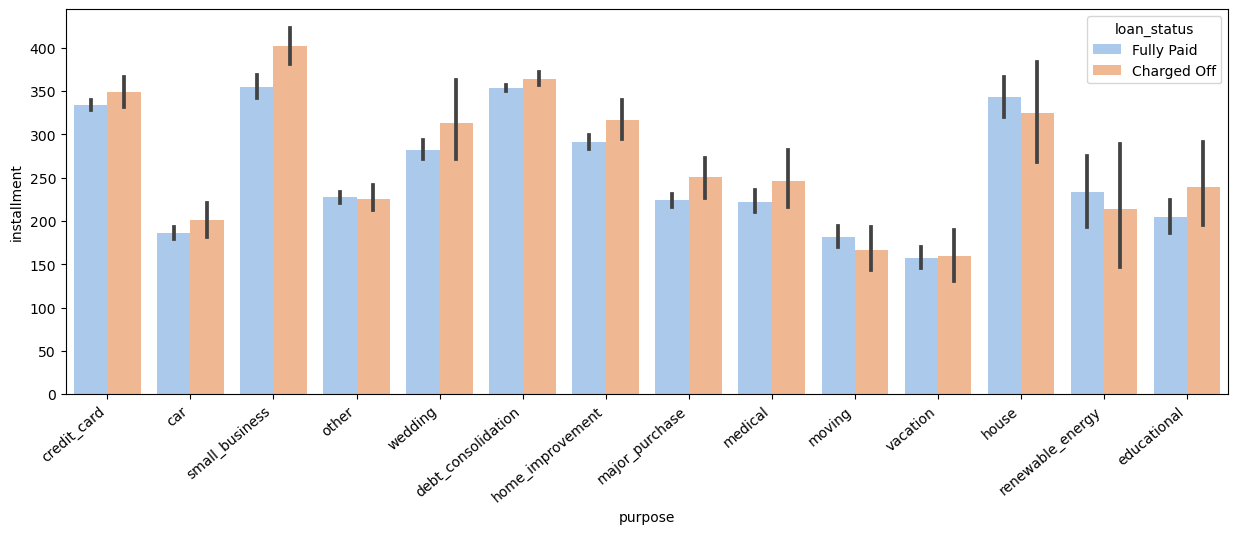

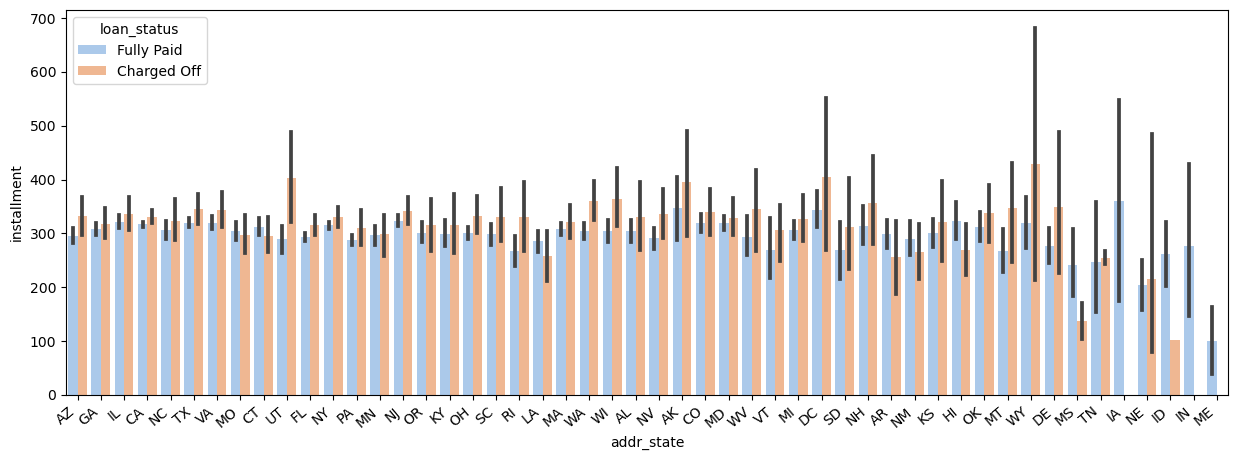

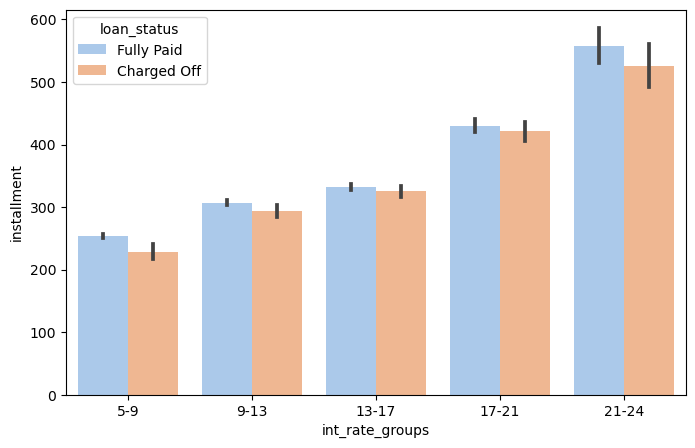

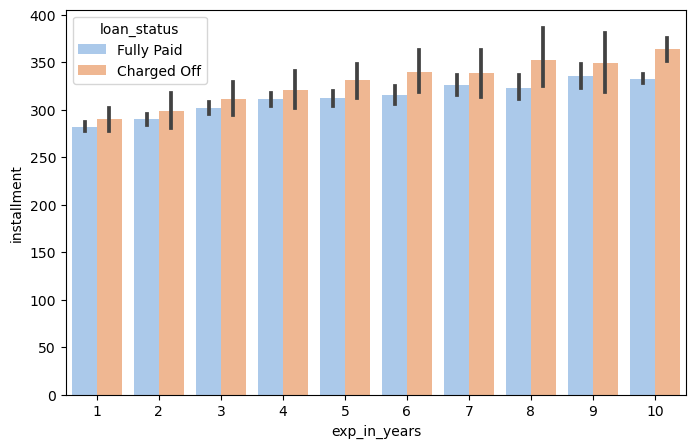

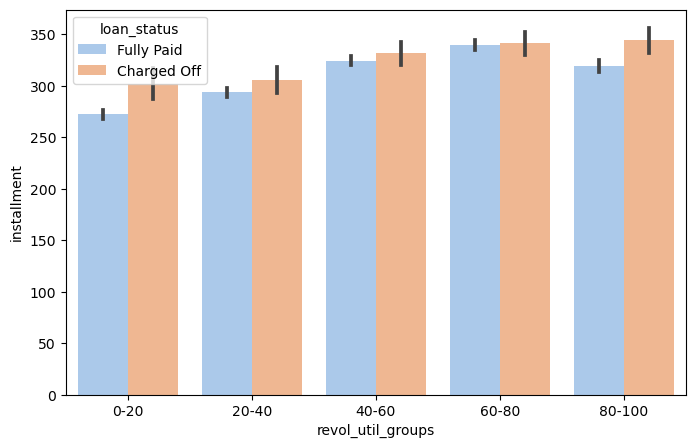

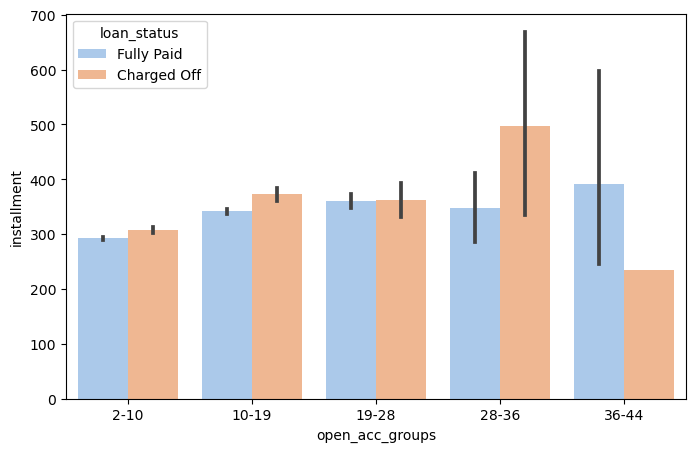

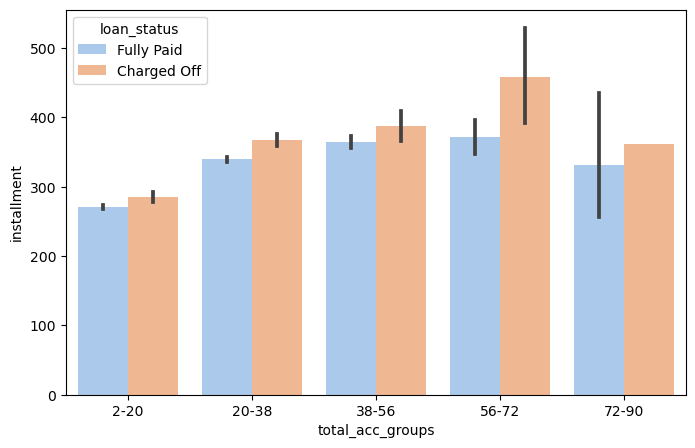

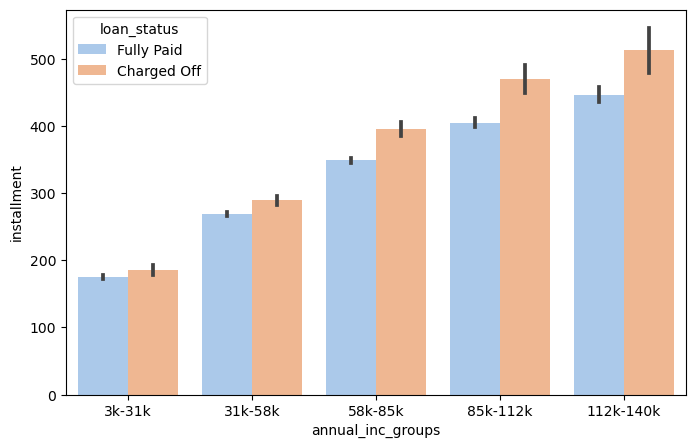

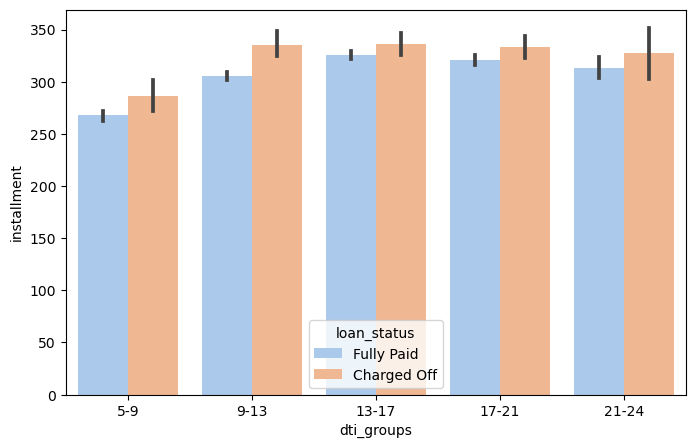

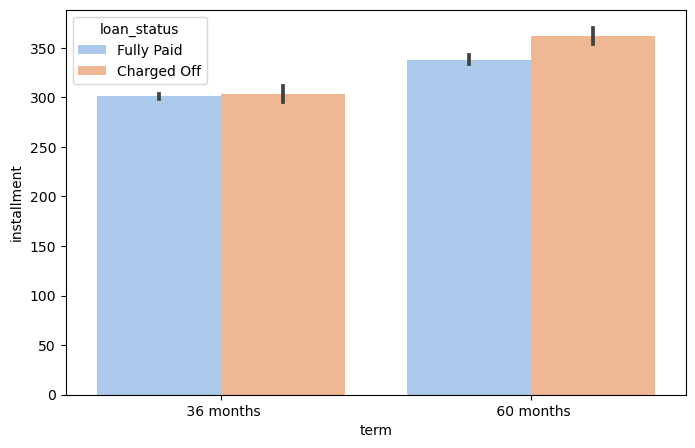

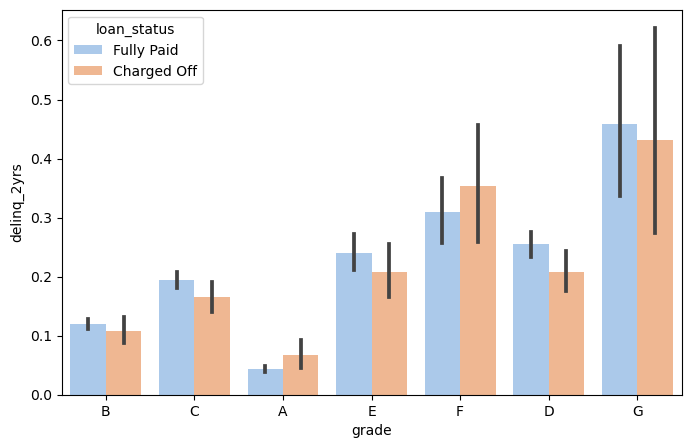

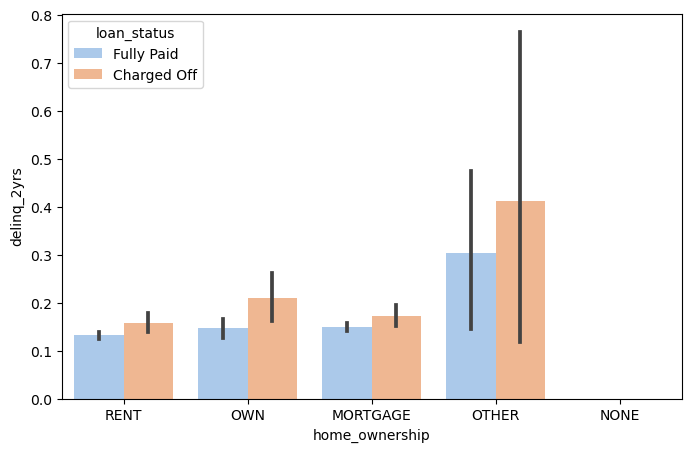

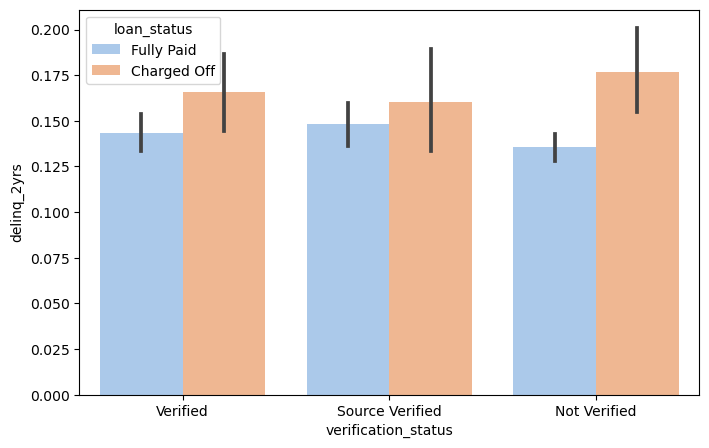

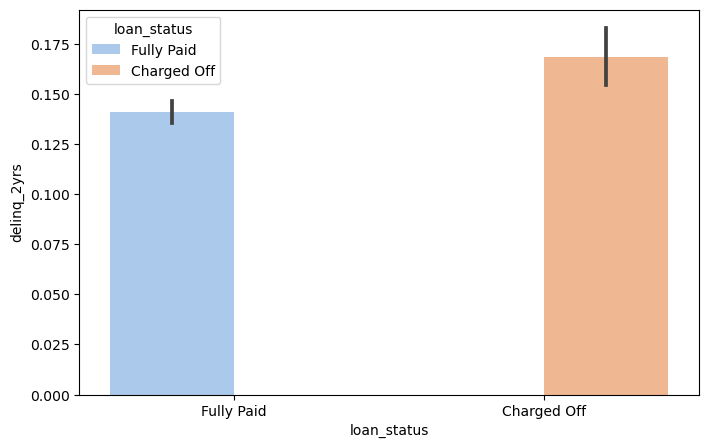

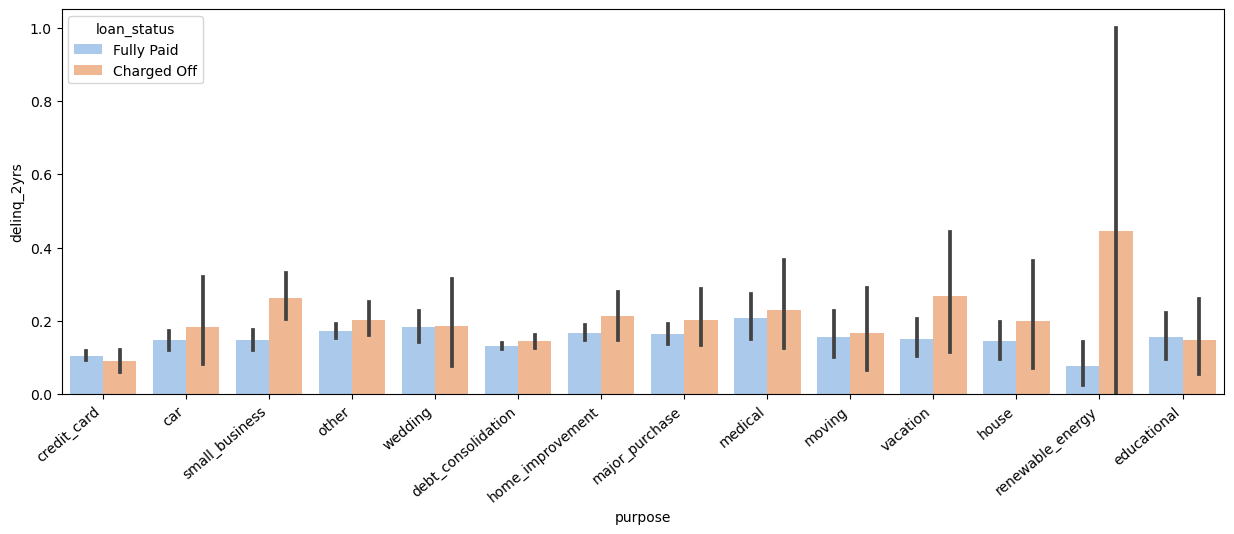

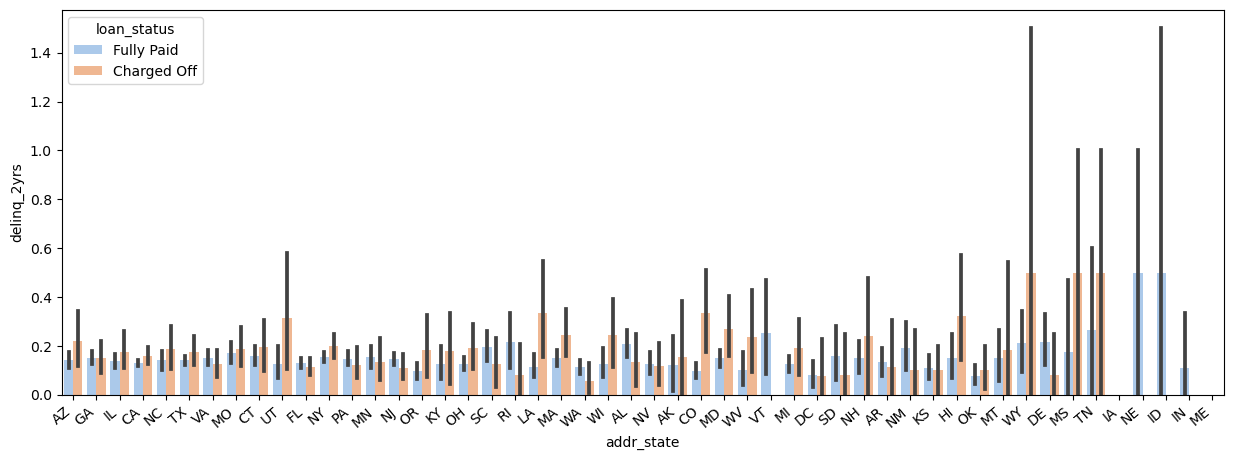

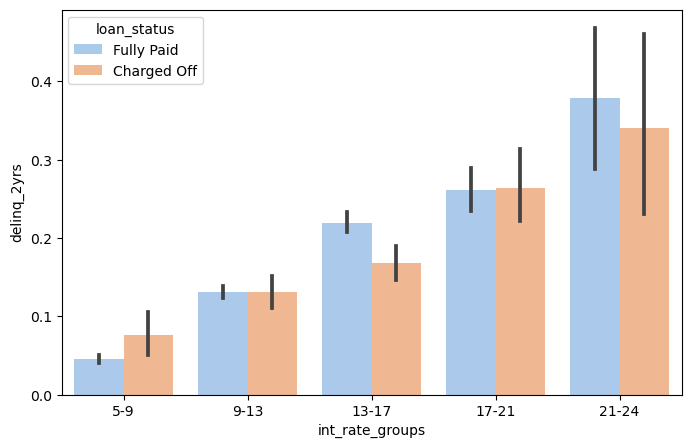

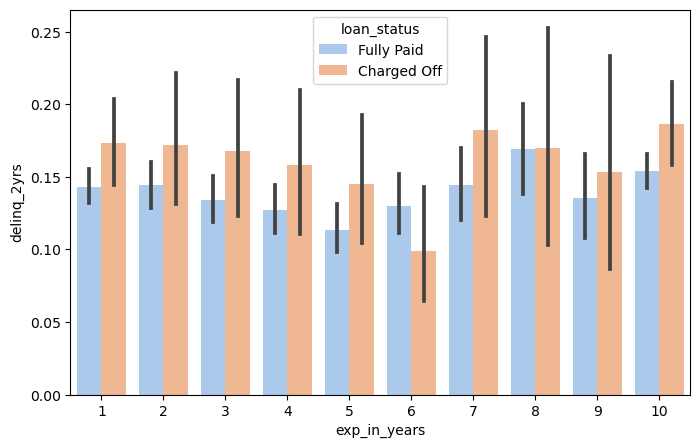

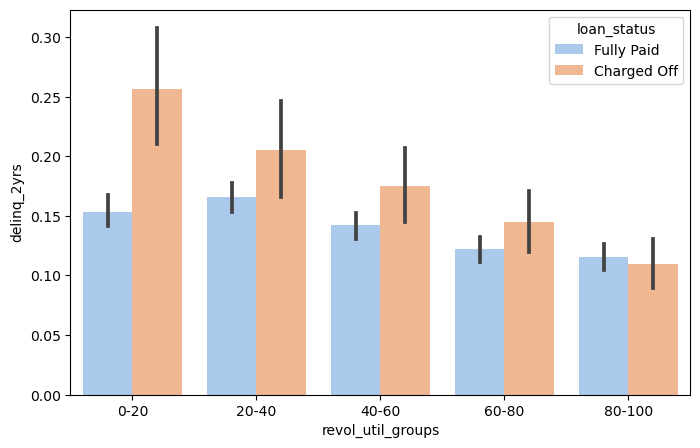

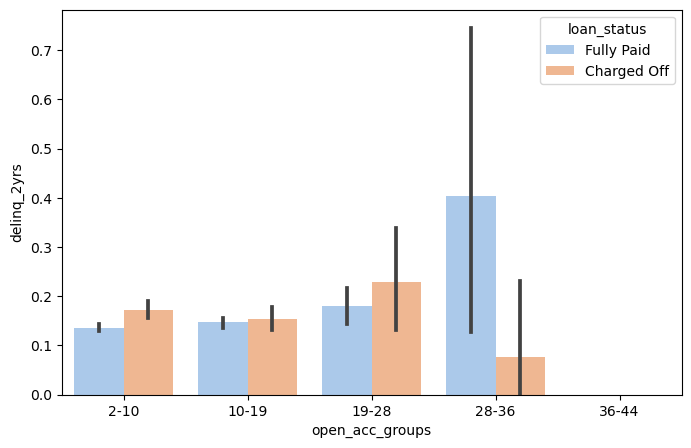

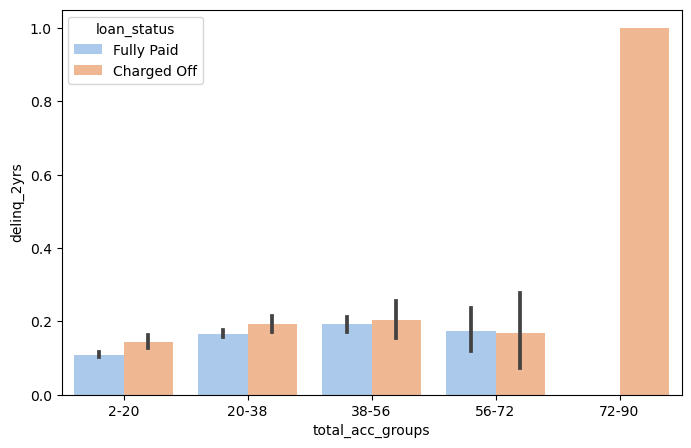

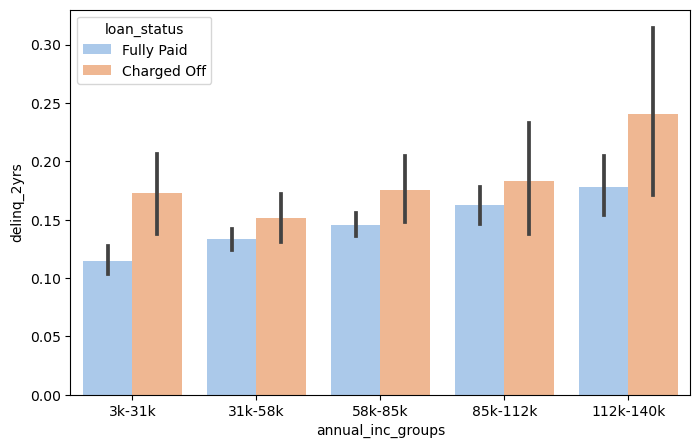

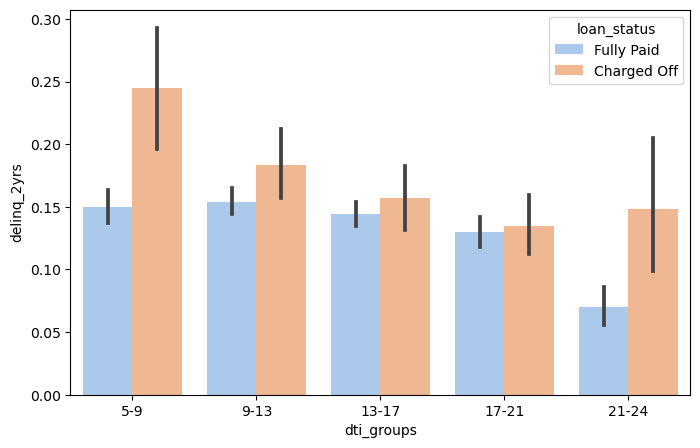

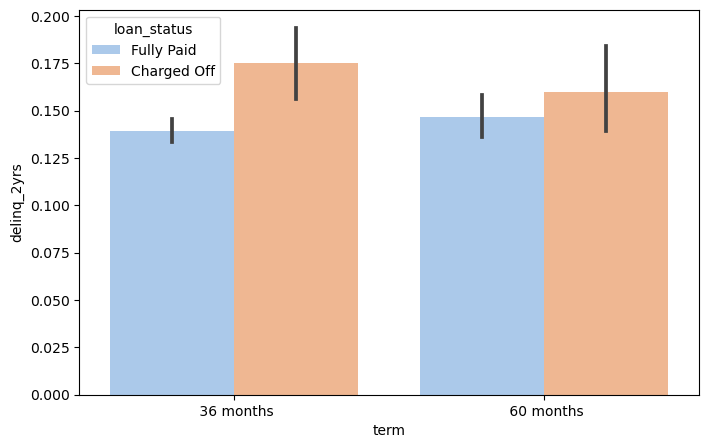

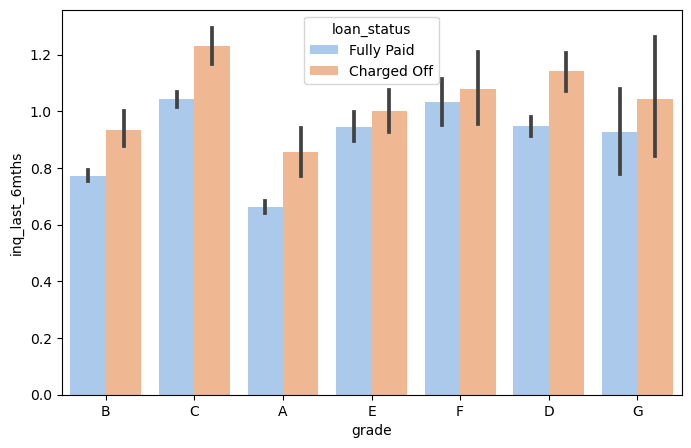

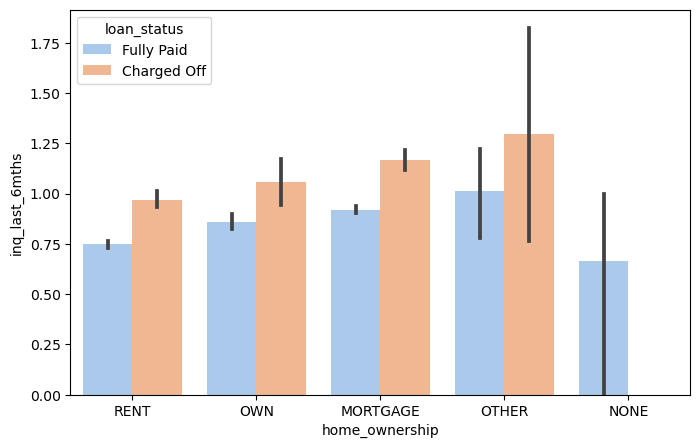

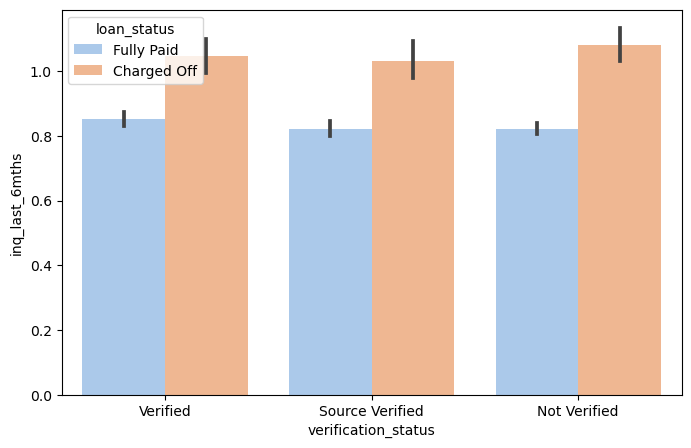

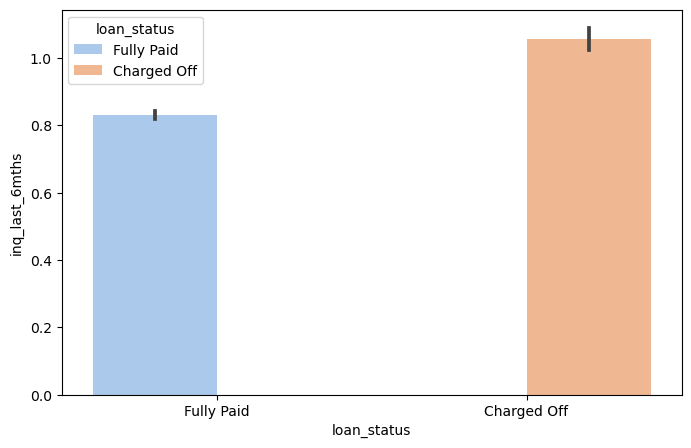

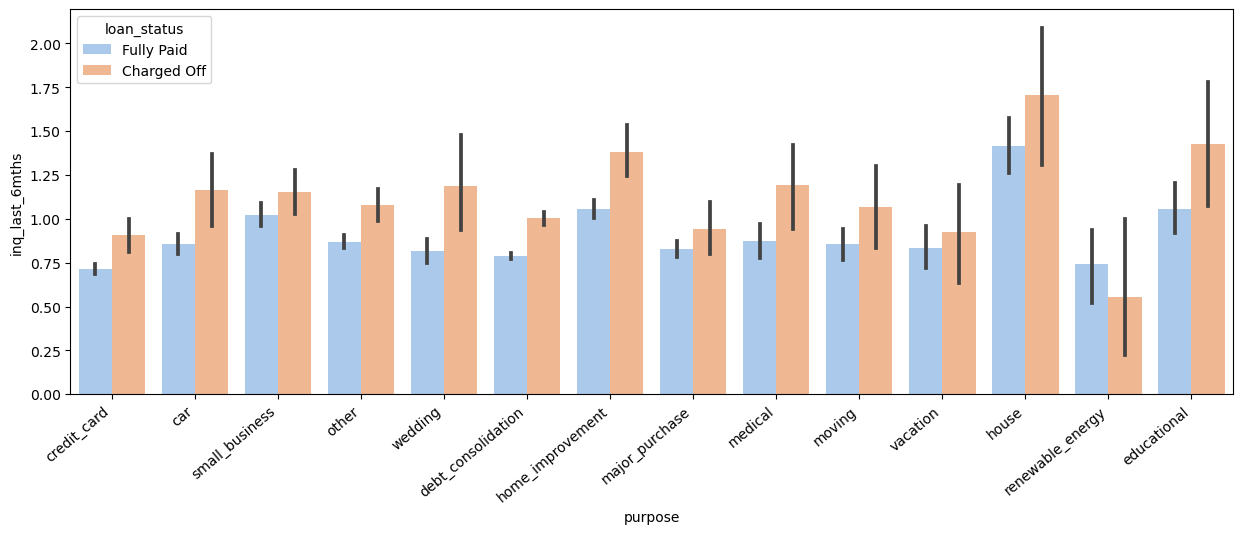

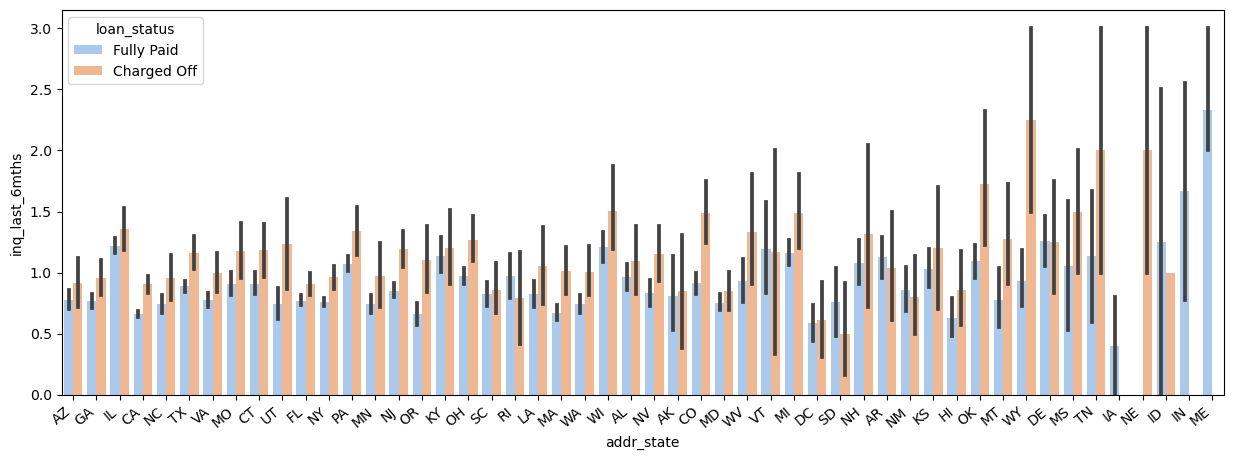

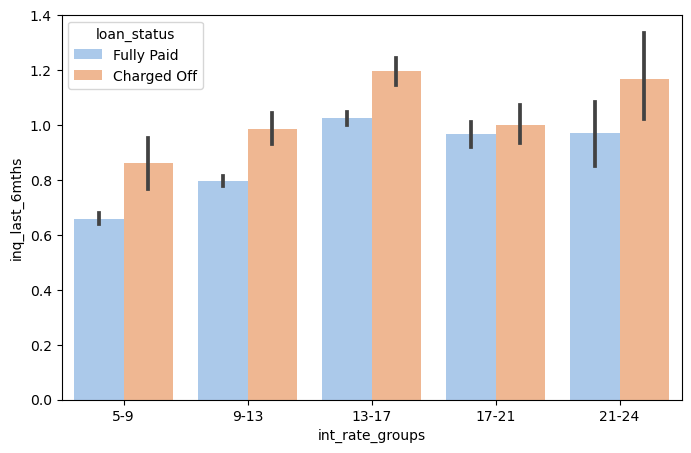

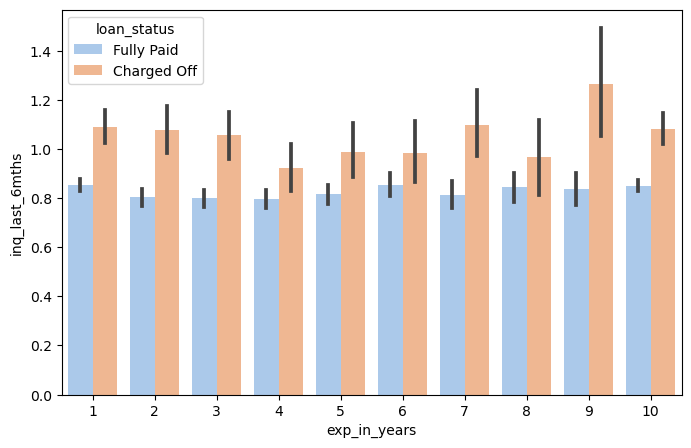

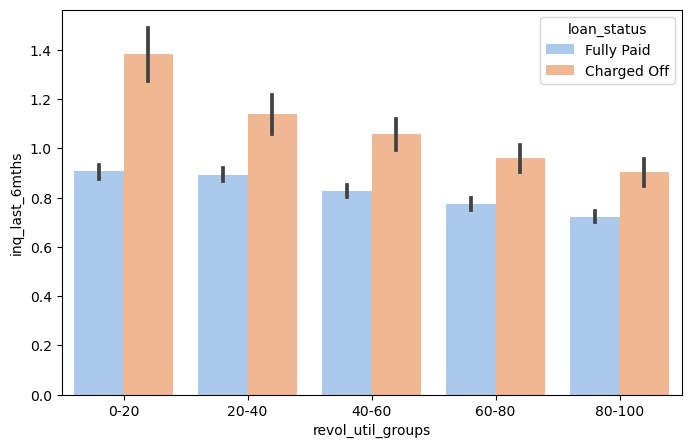

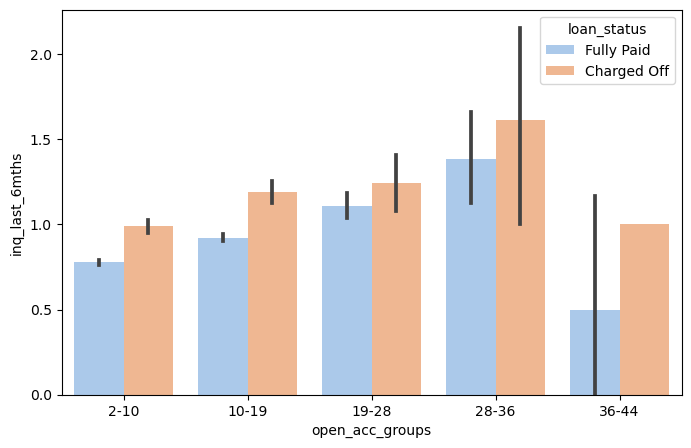

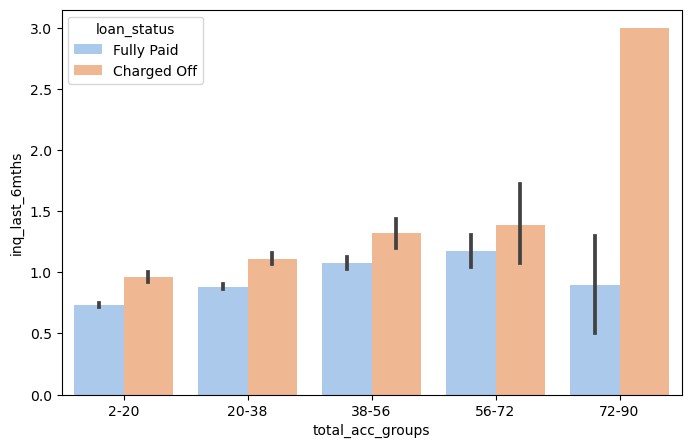

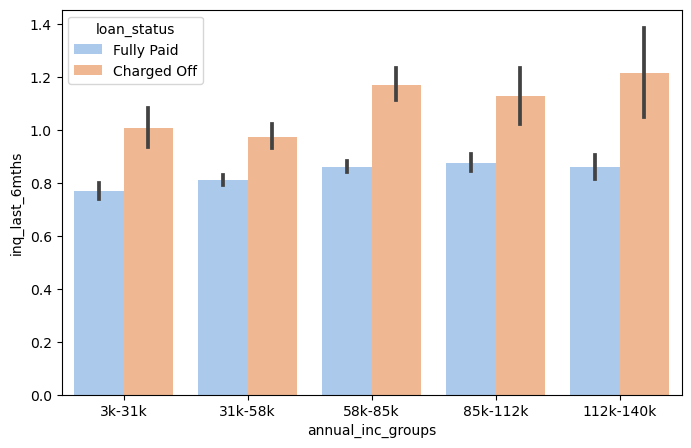

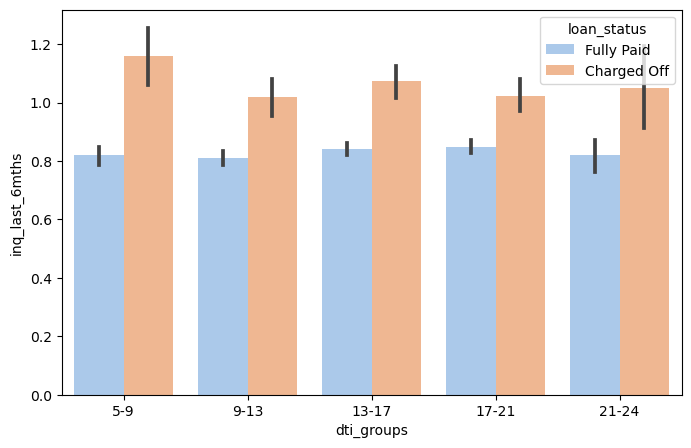

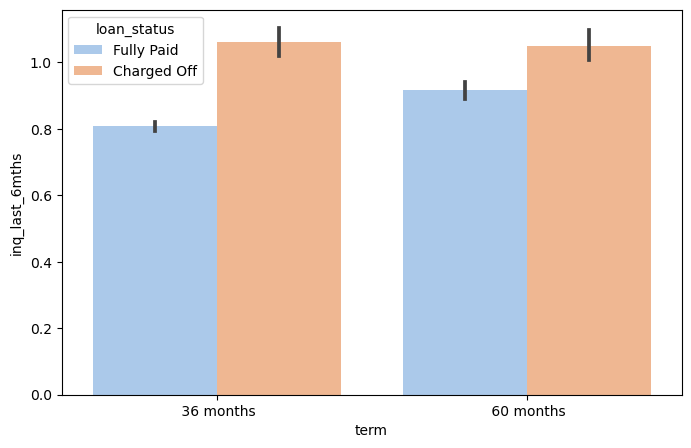

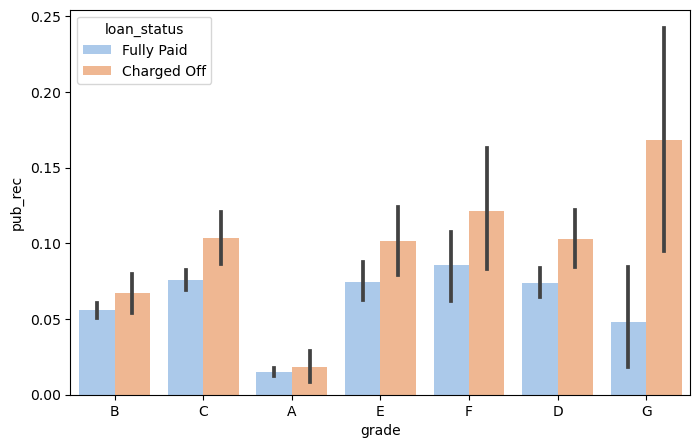

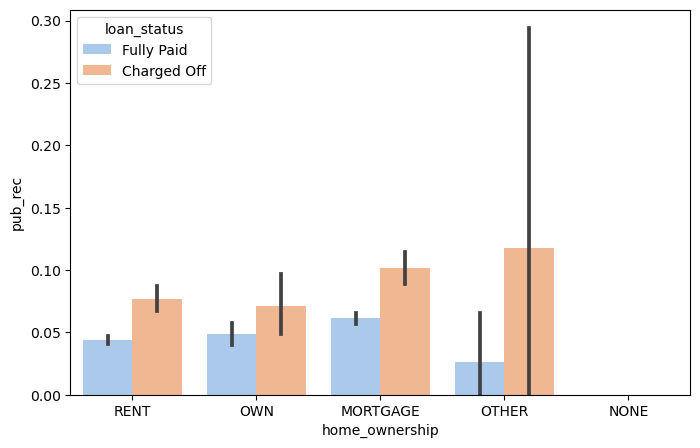

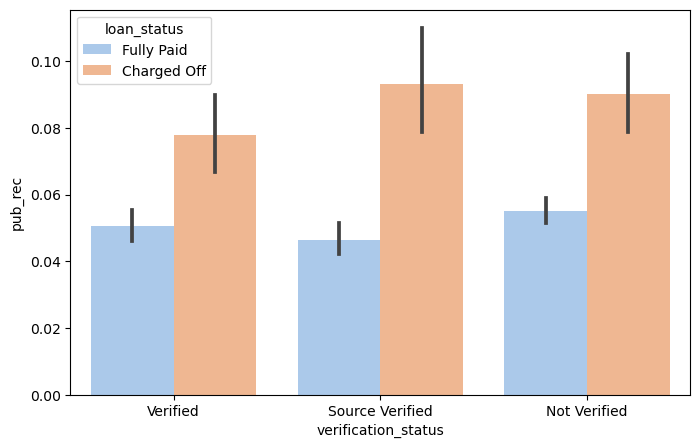

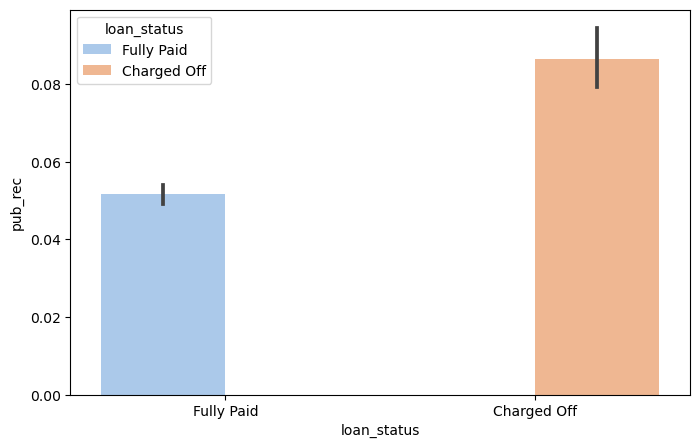

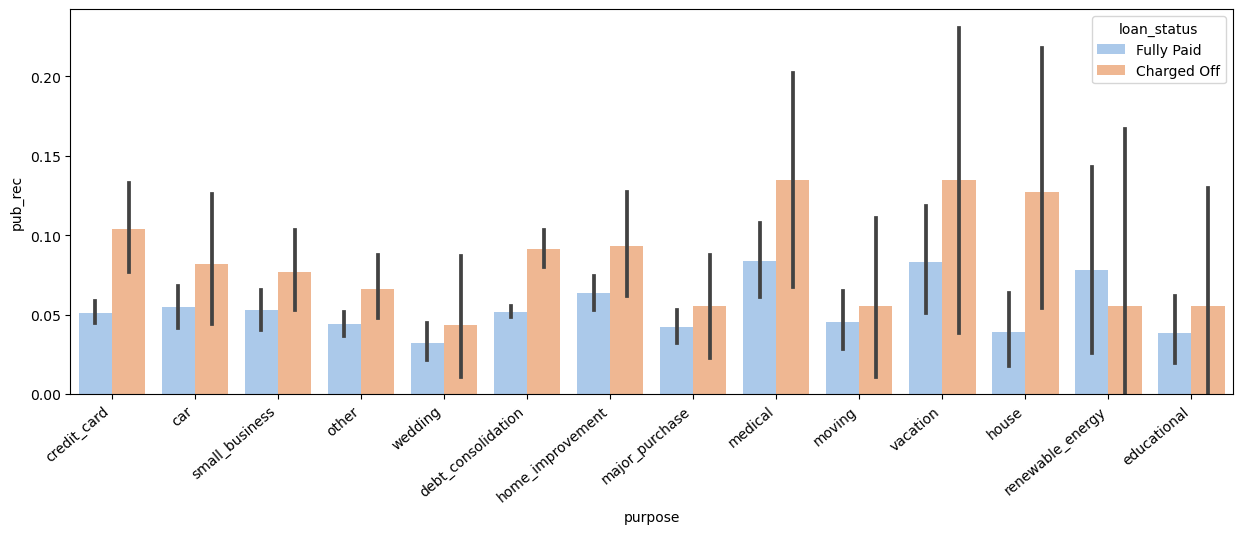

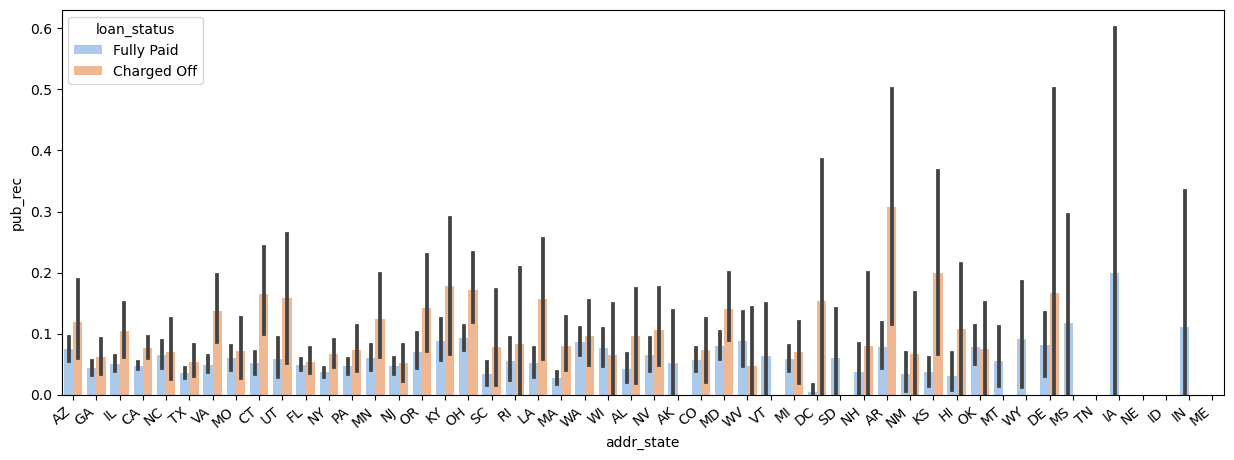

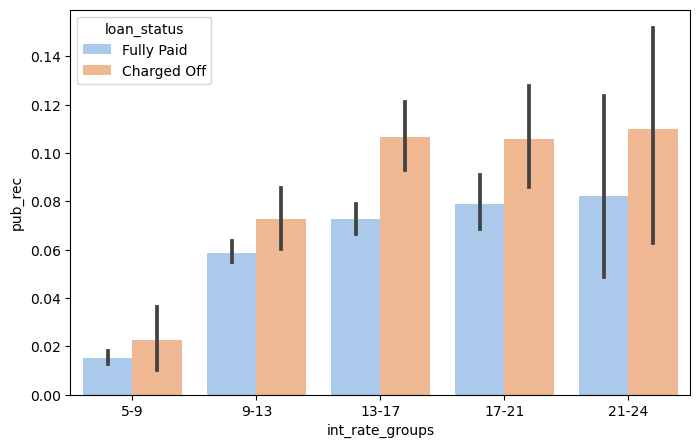

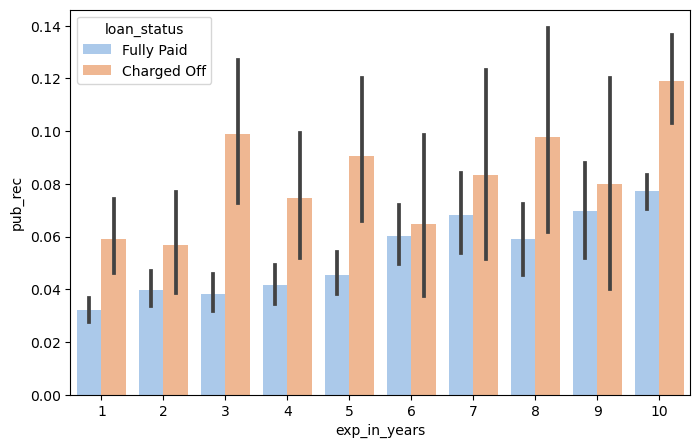

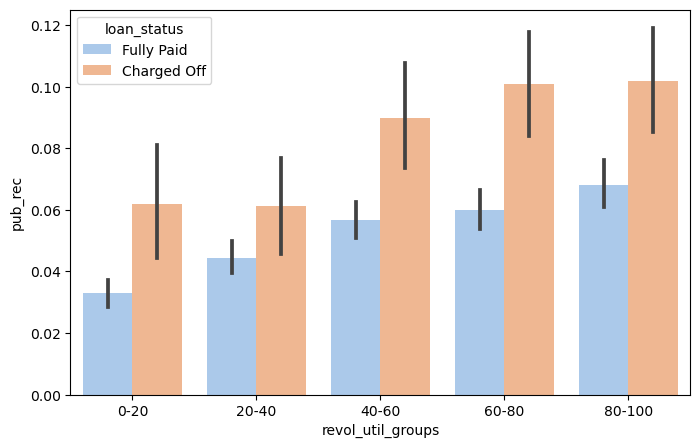

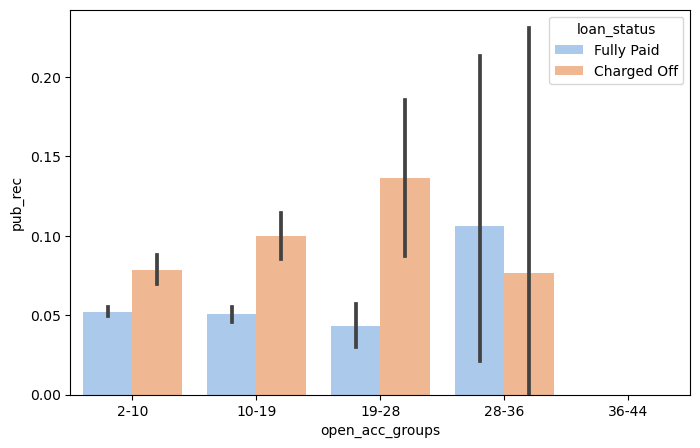

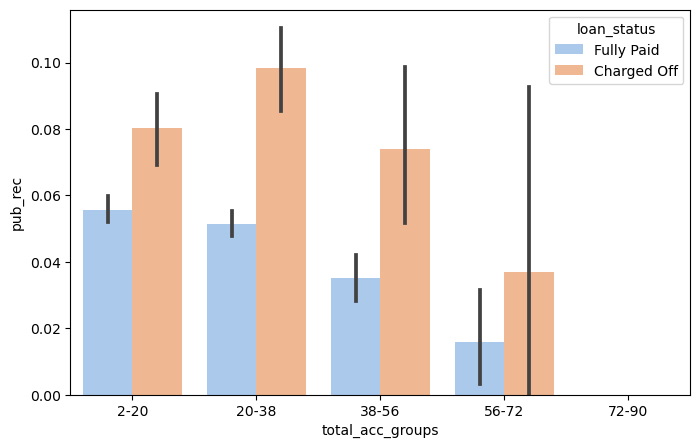

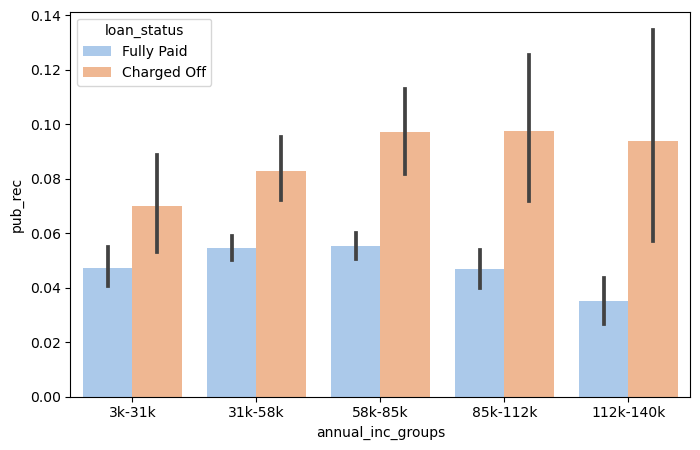

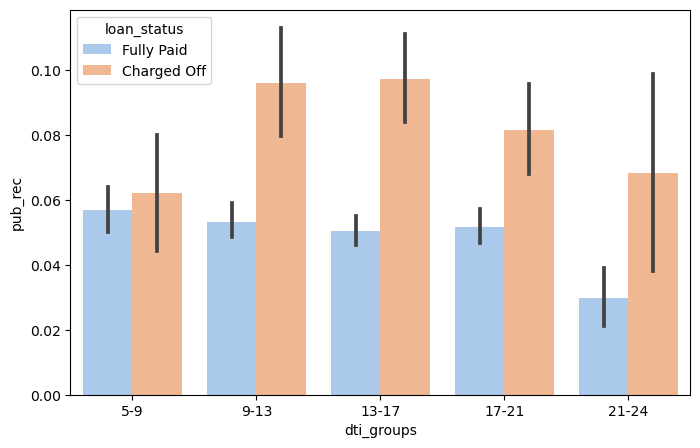

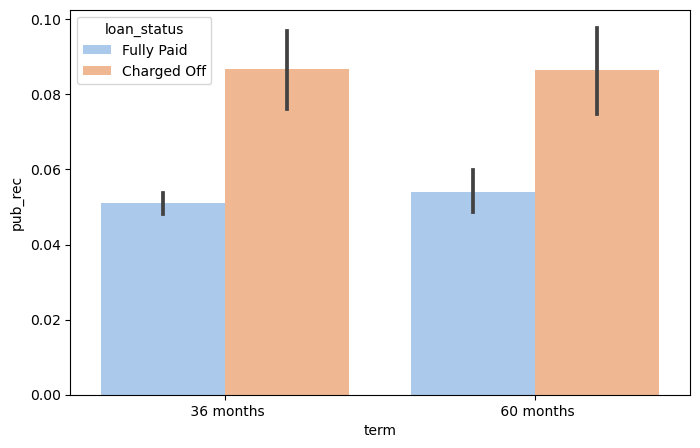

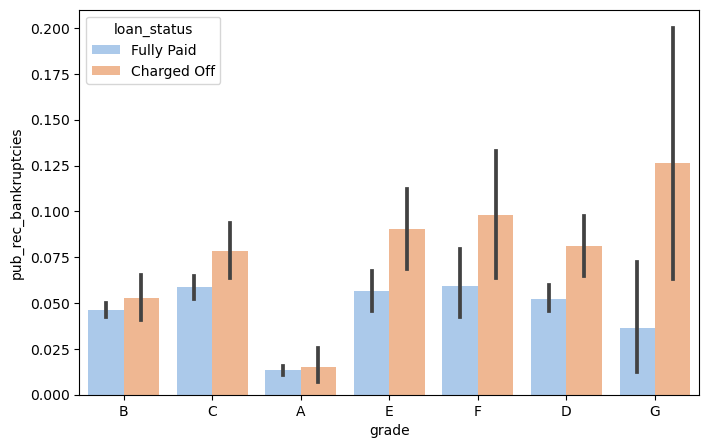

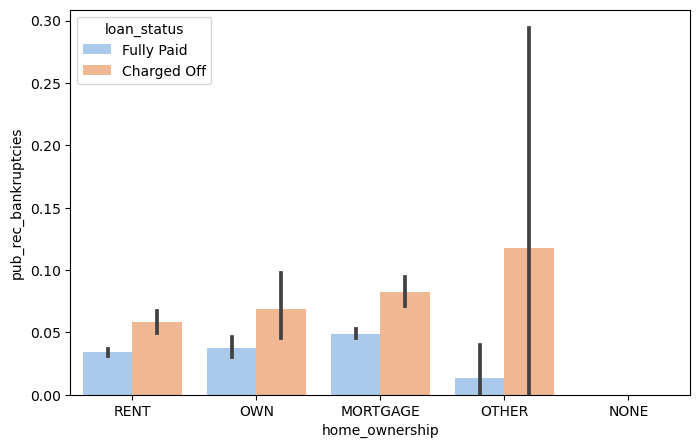

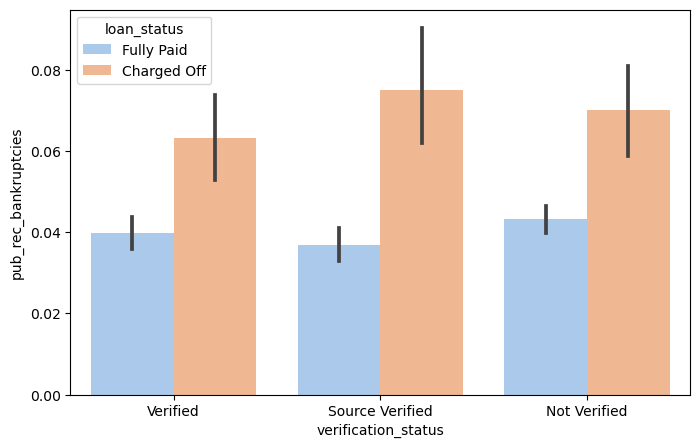

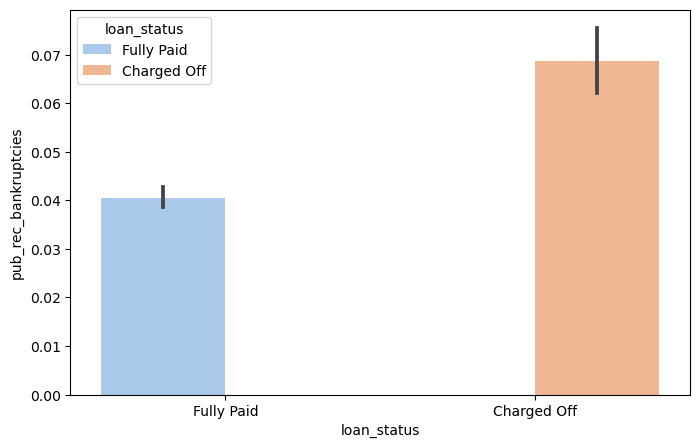

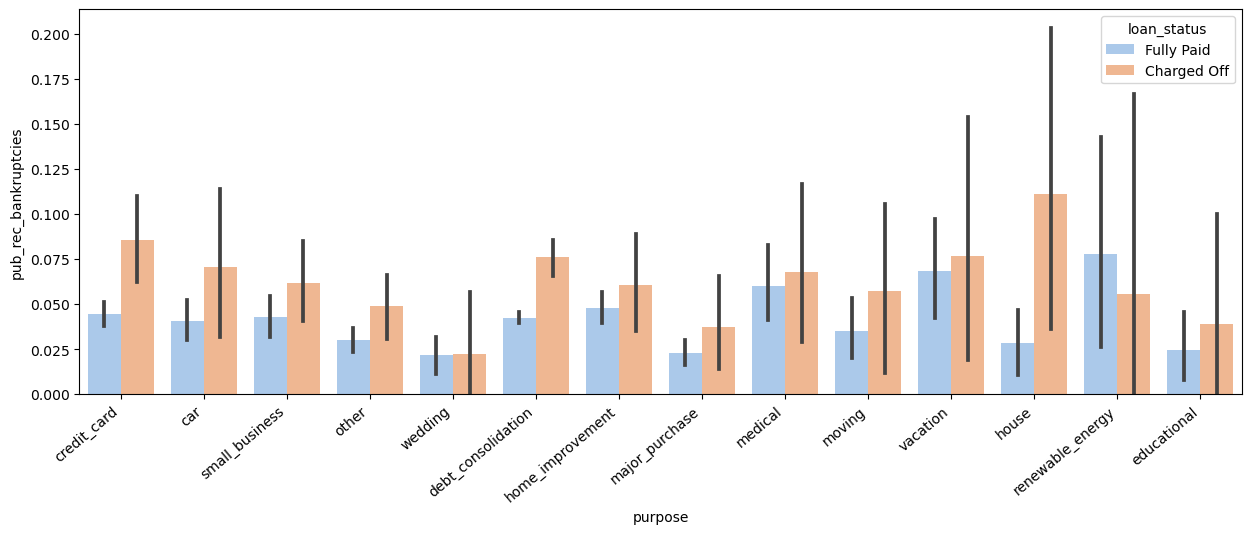

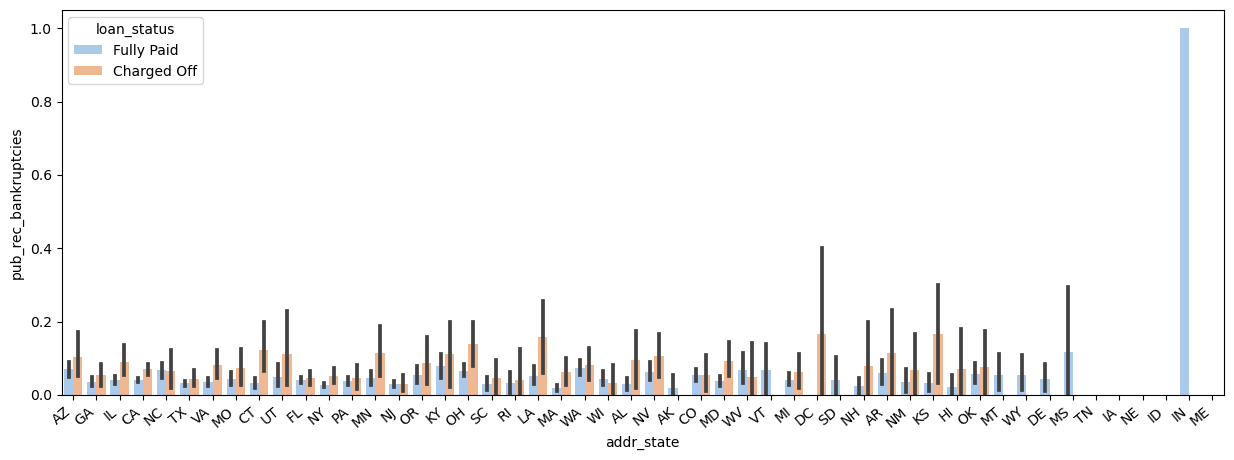

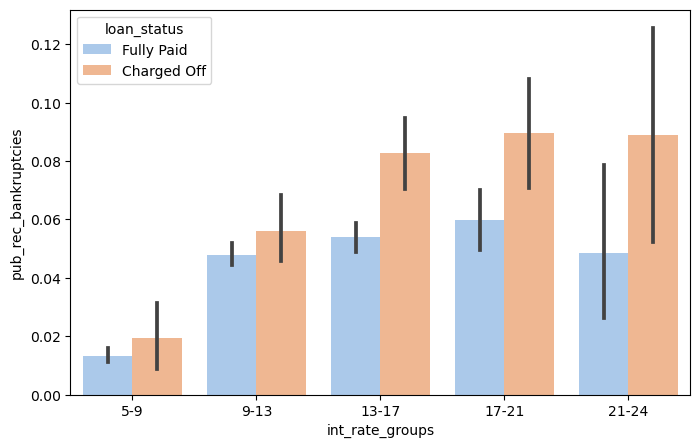

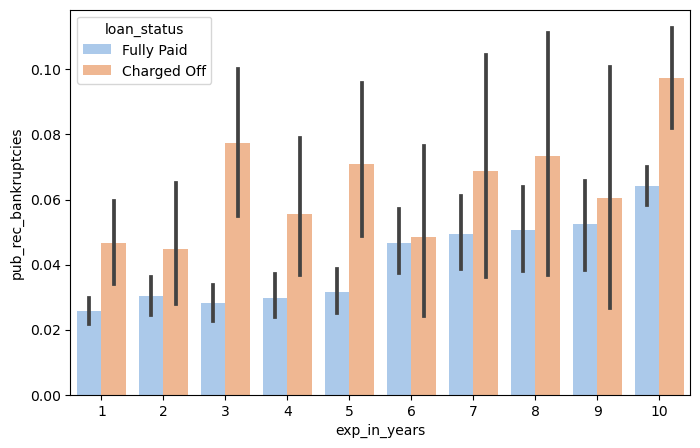

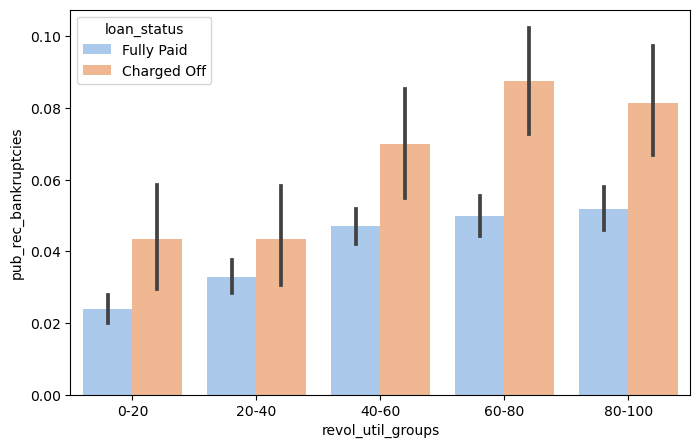

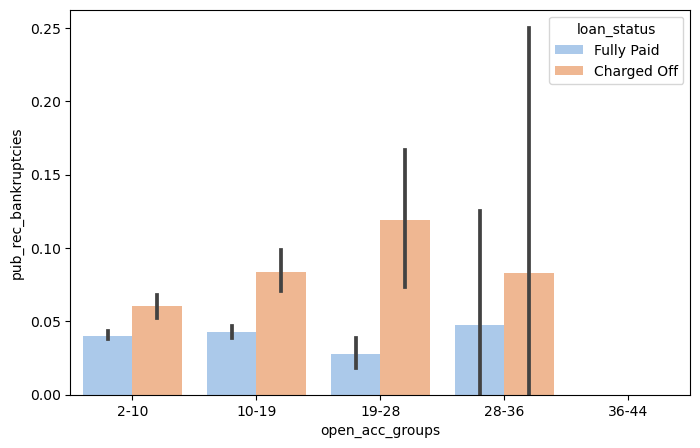

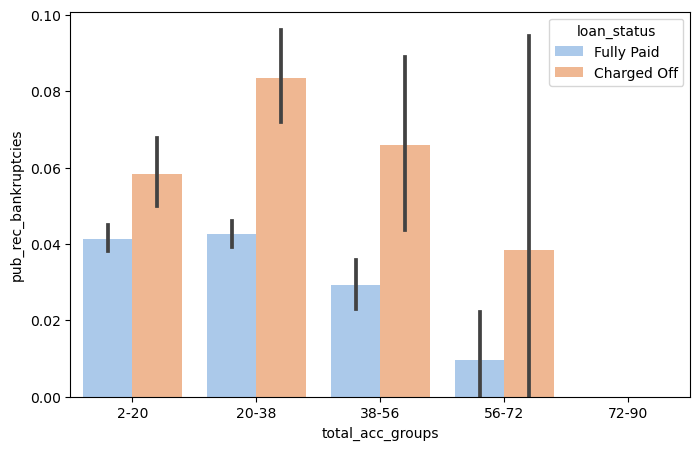

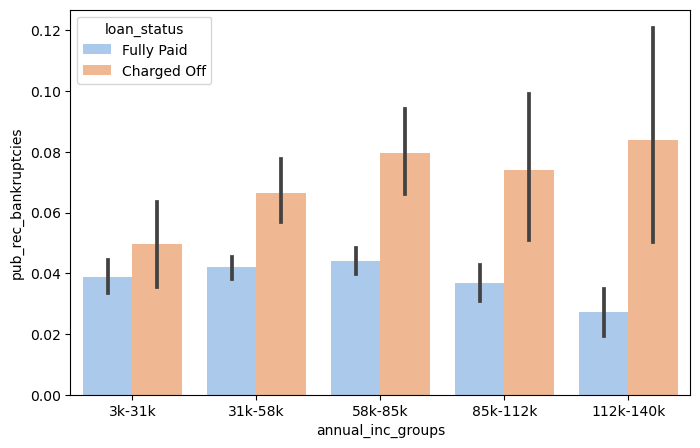

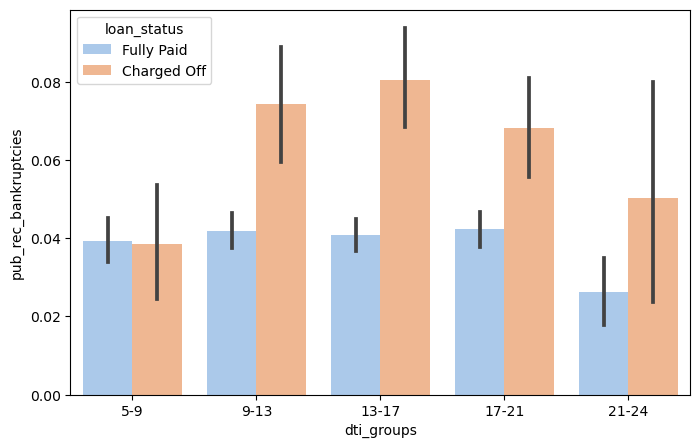

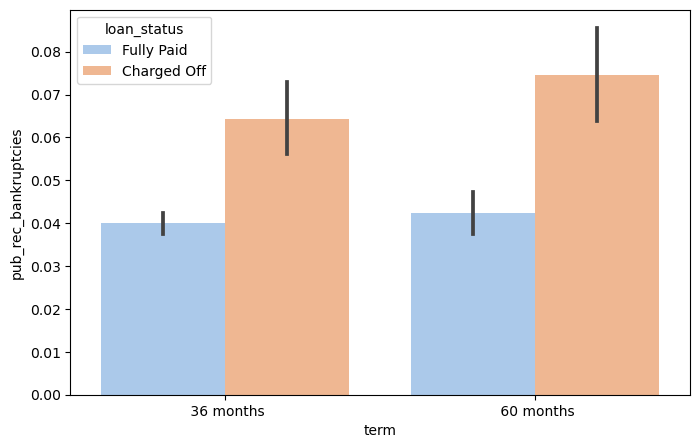

In [117]:
for col1 in cont_cols:
    for col2 in cat_cols:
        if (col2 in('addr_state','purpose')):
                   plt.figure(figsize=(15,5))
                   ax=sns.barplot(data=df,x=df[col2],y=df[col1],hue ='loan_status',palette="pastel")
                   ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        else:       
                   plt.figure(figsize=(8,5))
                   sns.barplot(data =df,x=df[col2], y=df[col1], hue ='loan_status',palette="pastel")#none has to  be included in others
        plt.show()

## Finding from Multivariate Analysis
### 1.Grade F whose loan amount of around 17500 has more defaulter.
### 2. Loan amount between 12000 and 14000 whose home ownership type is mortgage has more defaulter.
### 3. Loan amount 10000 to 12000 has more defaulter.
### 4. Small business whose loan amount is between12000 and 14000 will default. 
### 5.The total number of credit lines currently in the borrower's credit file between 56-72 and loan amount between 12500 and 16000
### 6. Income group between 112k and 140k and loan amount between 15000 and 18000
### 7. Installment and interest rate between 21-24%
### 8. Installment 300 to500 and The number of open credit lines in the borrower's credit file between 28 to 36.
### 9 Group G and The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years between .3 to .4.
### 10. The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years between .1 and .4 and purpose renewalable energy.
### 11. The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years .15to .25 Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit between 0-20 
###  12 The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years and The total number of credit lines currently in the borrower's credit file 79-90
### 13 A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years .15to .25
### 14 The number of inquiries in past 6 months (excluding auto and mortgage inquiries) between .7 to 3 and 
### 15 The total number of credit lines currently in the borrower's credit file 72-90 and The number of inquiries in past 6 months (excluding auto and mortgage inquiries) between .8 to 1.2
### 16LC assigned loan grade G and Number of derogatory public records .7 to .15






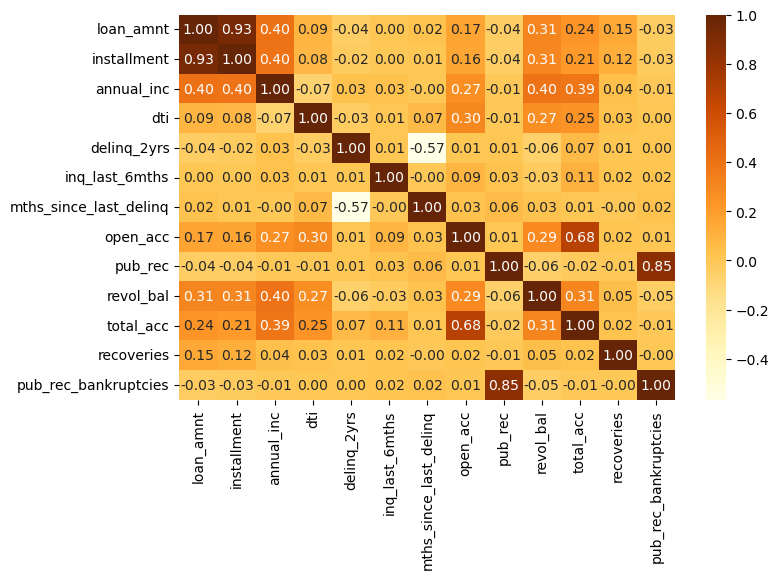

In [123]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()

# Conclusion:

## Consumer attributes that influence the tendency of default.
### 1.CA location default is more likely to default.
### 2 Experience of more than 10 years default more.
### 3.Person whose Annual income is between 31k-58K is more likely to be defaulter.
### .4.People staying on rent are more likely to default.
### 5.Small business whose loan amount is between12000 and 14000 will default. 


## Loan attributes that influence the tendency of default.
### 1 Loan term is 36 months
### 2.The total number of credit lines currently in the borrower's credit file 72-90 and The number of inquiries in past 6 months (excluding auto and mortgage inquiries) between .8 to 1.2
### 3.The number of open credit lines in the borrower's credit file, when it is between 2 to 10 has most defaulter.
### 4.The total number of credit lines currently in the borrower's credit file between 2 to 20 has more defaulter.
### 5. LC assigned loan grade G and Number of derogatory public records .7 to .15